In [1]:
# === Librerías principales ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

from astropy.table import Table

# === Análisis geométrico ===
from scipy.spatial import Delaunay
from itertools import combinations

# === Estética de visualización ===
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.1)

from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [2]:
import os
from astropy.table import Table

# Directorio donde están los .ecsv generados en 03_cartesianas
base_dir = "../XYZ_outputs/XYZ_data"

rosetas = list(range(20))

rosetas_dict = {}

for r_id in rosetas:
    # Rutas
    file_data = os.path.join(base_dir, f"BGS_{r_id}_clustering_data.ecsv")
    file_rand = os.path.join(base_dir, f"BGS_{r_id}_clustering_rand.ecsv")

    # Leer archivos .ecsv como astropy Table y convertir a pandas
    data = Table.read(file_data, format="ascii.ecsv").to_pandas()
    rand = Table.read(file_rand, format="ascii.ecsv").to_pandas()

    # Etiquetas: real (False), random (True)
    data['RAN'] = False
    rand['RAN'] = True

    # Concatenar y guardar
    df_all = pd.concat([data, rand], ignore_index=True)
    rosetas_dict[f"roseta_{r_id}"] = df_all

    # Vista previa
    print(f"Cargado BGS_{r_id}: {df_all.shape[0]} puntos (data + random)")


Cargado BGS_0: 33413 puntos (data + random)
Cargado BGS_1: 35443 puntos (data + random)
Cargado BGS_2: 34907 puntos (data + random)
Cargado BGS_3: 33402 puntos (data + random)
Cargado BGS_4: 35595 puntos (data + random)
Cargado BGS_5: 33806 puntos (data + random)
Cargado BGS_6: 31303 puntos (data + random)
Cargado BGS_7: 33667 puntos (data + random)
Cargado BGS_8: 34948 puntos (data + random)
Cargado BGS_9: 34700 puntos (data + random)
Cargado BGS_10: 34490 puntos (data + random)
Cargado BGS_11: 35429 puntos (data + random)
Cargado BGS_12: 32484 puntos (data + random)
Cargado BGS_13: 34785 puntos (data + random)
Cargado BGS_14: 31865 puntos (data + random)
Cargado BGS_15: 31249 puntos (data + random)
Cargado BGS_16: 34748 puntos (data + random)
Cargado BGS_17: 34402 puntos (data + random)
Cargado BGS_18: 32366 puntos (data + random)
Cargado BGS_19: 32319 puntos (data + random)


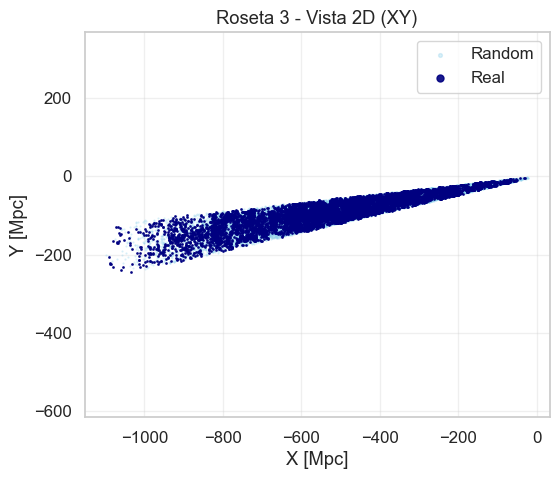

In [4]:
# Test
r_id = 3  
df = rosetas_dict[f"roseta_{r_id}"]

# Separar reales y randoms
is_real = ~df['RAN'].values
is_rand = df['RAN'].values

# 2D Plot (X vs Y)
plt.figure(figsize=(6, 5))
plt.scatter(df['X'][is_rand], df['Y'][is_rand], s=0.3, color='skyblue', label='Random', alpha=0.3)
plt.scatter(df['X'][is_real], df['Y'][is_real], s=1, color='navy', label='Real', alpha=0.9)
plt.xlabel('X [Mpc]')
plt.ylabel('Y [Mpc]')
plt.title(f'Roseta {r_id} - Vista 2D (XY)')
plt.legend(markerscale=5)
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

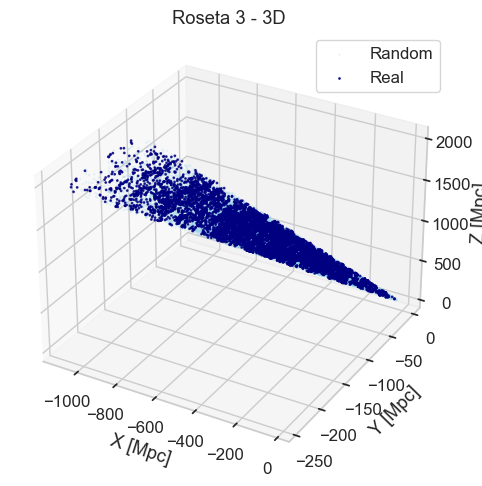

In [5]:
# Plot 3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'][is_rand], df['Y'][is_rand], df['Z'][is_rand], s=0.3, c='skyblue', alpha=0.2, label='Random')
ax.scatter(df['X'][is_real], df['Y'][is_real], df['Z'][is_real], s=1.0, c='navy', alpha=0.8, label='Real')
ax.set_xlabel('X [Mpc]')
ax.set_ylabel('Y [Mpc]')
ax.set_zlabel('Z [Mpc]')
ax.set_title(f'Roseta {r_id} - 3D')
ax.legend()
plt.tight_layout()
plt.show()


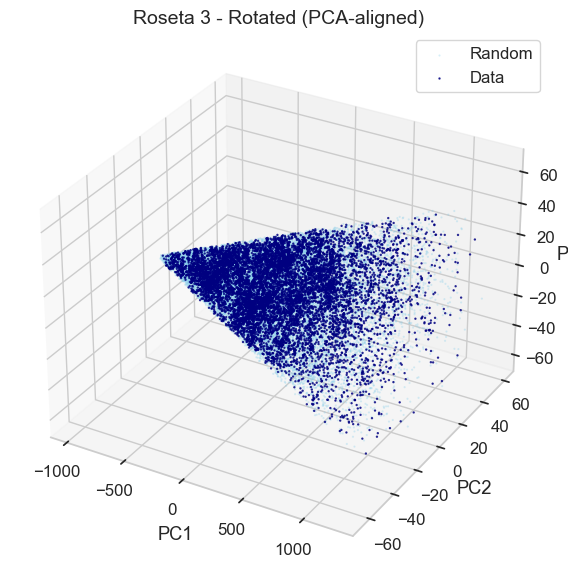

In [6]:
from sklearn.decomposition import PCA

r_id = 3
df = rosetas_dict[f"roseta_{r_id}"]

is_real = ~df['RAN'].values
is_rand = df['RAN'].values

# Datos para PCA (X, Y, Z)
coords = df[["X", "Y", "Z"]].values

# Aplicar PCA
pca = PCA(n_components=3)
coords_rotated = pca.fit_transform(coords)

# Separar coords rotados para reales y randoms
coords_real = coords_rotated[is_real]
coords_rand = coords_rotated[is_rand]

# Plot 3D rotado
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coords_rand[:, 0], coords_rand[:, 1], coords_rand[:, 2],
           c='skyblue', s=0.3, label='Random', alpha=0.3)

ax.scatter(coords_real[:, 0], coords_real[:, 1], coords_real[:, 2],
           c='navy', s=0.5, label='Data', alpha=0.8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'Roseta {r_id} - Rotated (PCA-aligned)', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()


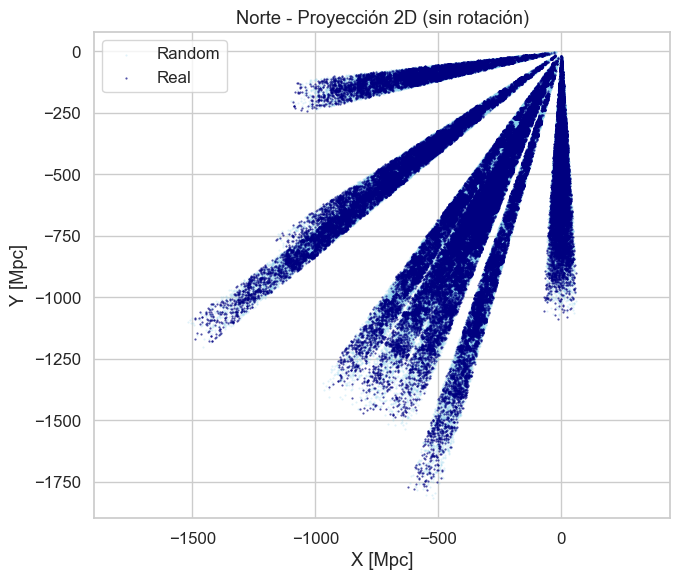

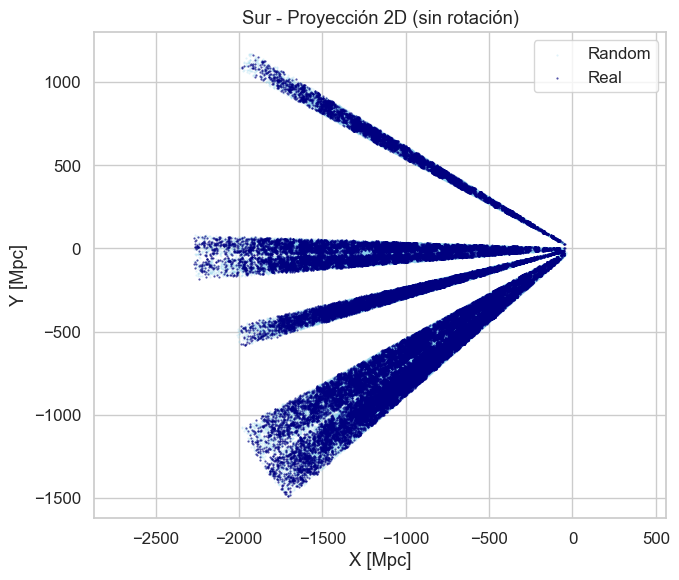

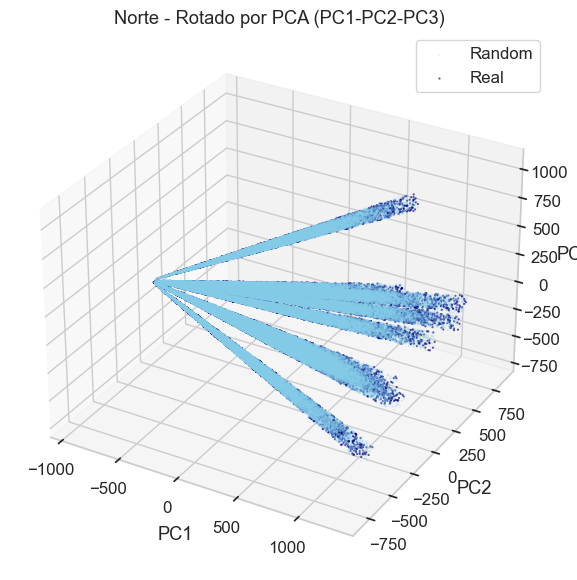

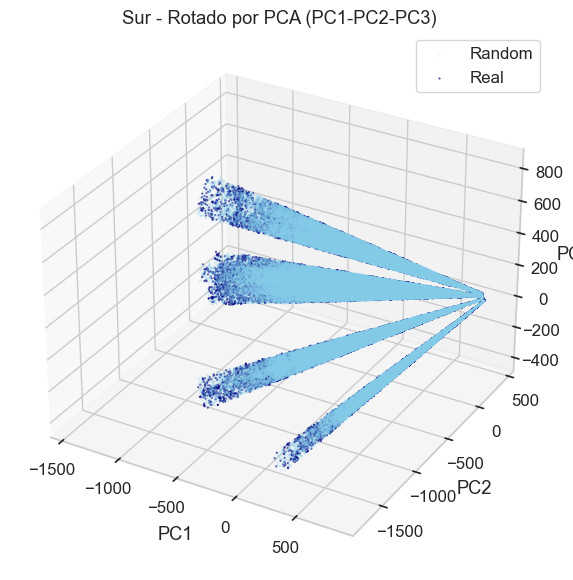

In [15]:
from sklearn.decomposition import PCA

north_rosetas = [3, 6, 7, 11, 12, 13, 14, 15, 18, 19]
south_rosetas = [0, 1, 2, 4, 5, 8, 9, 10, 16, 17]

# Función para obtener todos los puntos combinados de un hemisferio
def get_all_coords(roseta_ids):
    all_coords = []
    all_labels = []
    for r_id in roseta_ids:
        df = rosetas_dict[f"roseta_{r_id}"]
        coords = df[['X', 'Y', 'Z']].values
        labels = df['RAN'].values  # True = random, False = real
        all_coords.append(coords)
        all_labels.append(labels)
    return np.vstack(all_coords), np.concatenate(all_labels)

coords_N, labels_N = get_all_coords(north_rosetas)
coords_S, labels_S = get_all_coords(south_rosetas)

### ----------- 2D: Sin rotación ----------- ###
for coords, labels, hemi in [(coords_N, labels_N, 'Norte'), (coords_S, labels_S, 'Sur')]:
    plt.figure(figsize=(7, 6))
    plt.scatter(coords[labels, 0], coords[labels, 1], s=0.2, c='skyblue', alpha=0.3, label='Random')
    plt.scatter(coords[~labels, 0], coords[~labels, 1], s=0.3, c='navy', alpha=0.7, label='Real')
    plt.xlabel('X [Mpc]')
    plt.ylabel('Y [Mpc]')
    plt.title(f'{hemi} - Proyección 2D (sin rotación)')
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

### ----------- 3D: Con rotación PCA ----------- ###
for coords, labels, hemi in [(coords_N, labels_N, 'Norte'), (coords_S, labels_S, 'Sur')]:
    pca = PCA(n_components=3)
    coords_rot = pca.fit_transform(coords)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords_rot[labels, 0], coords_rot[labels, 1], coords_rot[labels, 2],
               s=0.2, c='skyblue', alpha=0.3, label='Random')
    ax.scatter(coords_rot[~labels, 0], coords_rot[~labels, 1], coords_rot[~labels, 2],
               s=0.3, c='navy', alpha=0.7, label='Real')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'{hemi} - Rotado por PCA (PC1-PC2-PC3)')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [16]:
from sklearn.decomposition import PCA
import os

output_dir = "../05_visualizaciones/rotated_structures"
os.makedirs(output_dir, exist_ok=True)

north_rosetas = [3, 6, 7, 11, 12, 13, 14, 15, 18, 19]
south_rosetas = [0, 1, 2, 4, 5, 8, 9, 10, 16, 17]

# ========== FUNCIONES ========== #
def get_all_coords(roseta_ids):
    all_coords = []
    all_labels = []
    for r_id in roseta_ids:
        df = rosetas_dict[f"roseta_{r_id}"]
        coords = df[['X', 'Y', 'Z']].values
        labels = df['RAN'].values
        all_coords.append(coords)
        all_labels.append(labels)
    return np.vstack(all_coords), np.concatenate(all_labels)

def save_plot(path):
    plt.tight_layout()
    plt.savefig(path, dpi=250)
    plt.close()
    print(f"Guardado: {path}")

# ========== PLOTS POR HEMISFERIO ========== #
for rosetas, hemi in [(north_rosetas, 'Norte'), (south_rosetas, 'Sur')]:
    coords, labels = get_all_coords(rosetas)
    
    # --- 2D plot ---
    plt.figure(figsize=(7, 6))
    plt.scatter(coords[labels, 0], coords[labels, 1], s=0.2, c='skyblue', alpha=0.3, label='Random')
    plt.scatter(coords[~labels, 0], coords[~labels, 1], s=0.3, c='navy', alpha=0.7, label='Real')
    plt.xlabel('X [Mpc]'); plt.ylabel('Y [Mpc]')
    plt.title(f'{hemi} - Proyección 2D (sin rotación)')
    plt.axis('equal'); plt.legend()
    save_plot(f"{output_dir}/global_{hemi}_2D.png")

    # --- 3D PCA plot ---
    pca = PCA(n_components=3)
    coords_rot = pca.fit_transform(coords)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords_rot[labels, 0], coords_rot[labels, 1], coords_rot[labels, 2],
               s=0.2, c='skyblue', alpha=0.3, label='Random')
    ax.scatter(coords_rot[~labels, 0], coords_rot[~labels, 1], coords_rot[~labels, 2],
               s=0.3, c='navy', alpha=0.7, label='Real')
    ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
    ax.set_title(f'{hemi} - PCA rotado')
    ax.legend()
    save_plot(f"{output_dir}/global_{hemi}_3D.png")

# ========== PLOTS INDIVIDUALES POR ROSETA ========== #
for r_id in range(20):
    df = rosetas_dict[f"roseta_{r_id}"]
    coords = df[['X', 'Y', 'Z']].values
    labels = df['RAN'].values

    # --- 2D plot ---
    plt.figure(figsize=(6, 5))
    plt.scatter(coords[labels, 0], coords[labels, 1], s=0.2, c='skyblue', alpha=0.3, label='Random')
    plt.scatter(coords[~labels, 0], coords[~labels, 1], s=0.3, c='navy', alpha=0.7, label='Real')
    plt.xlabel('X [Mpc]'); plt.ylabel('Y [Mpc]')
    plt.title(f'Roseta {r_id} - 2D (XY)')
    plt.axis('equal'); plt.legend()
    save_plot(f"{output_dir}/roseta_{r_id}_2D.png")

    # --- 3D rotado ---
    pca = PCA(n_components=3)
    coords_rot = pca.fit_transform(coords)
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords_rot[labels, 0], coords_rot[labels, 1], coords_rot[labels, 2],
               s=0.2, c='skyblue', alpha=0.3, label='Random')
    ax.scatter(coords_rot[~labels, 0], coords_rot[~labels, 1], coords_rot[~labels, 2],
               s=0.3, c='navy', alpha=0.7, label='Real')
    ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
    ax.set_title(f'Roseta {r_id} - PCA rotado')
    ax.legend()
    save_plot(f"{output_dir}/roseta_{r_id}_3D.png")


Guardado: ../05_visualizaciones/rotated_structures/global_Norte_2D.png
Guardado: ../05_visualizaciones/rotated_structures/global_Norte_3D.png
Guardado: ../05_visualizaciones/rotated_structures/global_Sur_2D.png
Guardado: ../05_visualizaciones/rotated_structures/global_Sur_3D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_0_2D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_0_3D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_1_2D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_1_3D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_2_2D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_2_3D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_3_2D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_3_3D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_4_2D.png
Guardado: ../05_visualizaciones/rotated_structures/roseta_4_3D.png
Guardado: ../05_visualizaciones/rotated_structures

In [3]:
from scipy.spatial import Delaunay
from itertools import combinations
import time

rosetas_r = {}

# Función para calcular vecinos y r
def compute_r(df):
    coords = df[['X', 'Y', 'Z']].values
    is_data = ~df['RAN'].values

    # Triangulación Delaunay
    try:
        tri = Delaunay(coords)
    except:
        print("Falló triangulación en esta roseta (posiblemente muy pocos puntos)")
        return None

    # Crear lista de vecinos
    neighbors = {i: set() for i in range(len(coords))}
    for simplex in tri.simplices:
        for i, j in combinations(simplex, 2):
            neighbors[i].add(j)
            neighbors[j].add(i)

    # Calcular r para cada punto
    r = np.zeros(len(coords), dtype=float)
    for i, nbrs in neighbors.items():
        n_data = np.sum(is_data[list(nbrs)])
        n_rand = len(nbrs) - n_data
        if (n_data + n_rand) > 0:
            r[i] = (n_data - n_rand) / (n_data + n_rand)
        else:
            r[i] = np.nan  

    
    df_out = df.copy()
    df_out['r'] = r
    return df_out

start = time.time()
for r_id in range(20):
    df = rosetas_dict[f"roseta_{r_id}"]
    df_with_r = compute_r(df)
    if df_with_r is not None:
        rosetas_r[f"roseta_{r_id}"] = df_with_r
        print(f" r calculado para roseta {r_id}")
    else:
        print(f" Roseta {r_id} omitida por error de triangulación")
end = time.time()
print(f"\n Tiempo total: {end - start:.2f} segundos")


 r calculado para roseta 0
 r calculado para roseta 1
 r calculado para roseta 2
 r calculado para roseta 3
 r calculado para roseta 4
 r calculado para roseta 5
 r calculado para roseta 6
 r calculado para roseta 7
 r calculado para roseta 8
 r calculado para roseta 9
 r calculado para roseta 10
 r calculado para roseta 11
 r calculado para roseta 12
 r calculado para roseta 13
 r calculado para roseta 14
 r calculado para roseta 15
 r calculado para roseta 16
 r calculado para roseta 17
 r calculado para roseta 18
 r calculado para roseta 19

 Tiempo total: 34.59 segundos


In [4]:
# Diccionario para guardar los DataFrames con la nueva columna 'TYPE'
rosetas_typed = {}

# Función para clasificar según r
def classify_cosmic_type(df):
    df = df.copy()
    r = df['r']

    df['TYPE'] = pd.Series(dtype='object')

    df.loc[r < -0.5, 'TYPE'] = 'void'
    df.loc[(r >= -0.5) & (r < 0), 'TYPE'] = 'sheet'
    df.loc[(r >= 0) & (r < 0.5), 'TYPE'] = 'filament'
    df.loc[r >= 0.5, 'TYPE'] = 'knot'

    return df

# Aplicar a todas las rosetas que ya tienen r
for r_id in rosetas_r:
    df_r = rosetas_r[r_id]
    df_typed = classify_cosmic_type(df_r)
    rosetas_typed[r_id] = df_typed
    print(f" Roseta {r_id}: clasificada por tipo cósmico")


 Roseta roseta_0: clasificada por tipo cósmico
 Roseta roseta_1: clasificada por tipo cósmico
 Roseta roseta_2: clasificada por tipo cósmico
 Roseta roseta_3: clasificada por tipo cósmico
 Roseta roseta_4: clasificada por tipo cósmico
 Roseta roseta_5: clasificada por tipo cósmico
 Roseta roseta_6: clasificada por tipo cósmico
 Roseta roseta_7: clasificada por tipo cósmico
 Roseta roseta_8: clasificada por tipo cósmico
 Roseta roseta_9: clasificada por tipo cósmico
 Roseta roseta_10: clasificada por tipo cósmico
 Roseta roseta_11: clasificada por tipo cósmico
 Roseta roseta_12: clasificada por tipo cósmico
 Roseta roseta_13: clasificada por tipo cósmico
 Roseta roseta_14: clasificada por tipo cósmico
 Roseta roseta_15: clasificada por tipo cósmico
 Roseta roseta_16: clasificada por tipo cósmico
 Roseta roseta_17: clasificada por tipo cósmico
 Roseta roseta_18: clasificada por tipo cósmico
 Roseta roseta_19: clasificada por tipo cósmico


In [5]:
print(rosetas_typed.keys())

dict_keys(['roseta_0', 'roseta_1', 'roseta_2', 'roseta_3', 'roseta_4', 'roseta_5', 'roseta_6', 'roseta_7', 'roseta_8', 'roseta_9', 'roseta_10', 'roseta_11', 'roseta_12', 'roseta_13', 'roseta_14', 'roseta_15', 'roseta_16', 'roseta_17', 'roseta_18', 'roseta_19'])


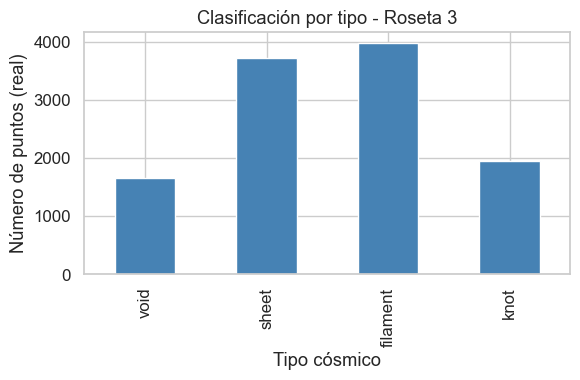

In [6]:
ros_test = 3
key = f"roseta_{ros_test}"
df = rosetas_typed[key]

plt.figure(figsize=(6, 4))
df[~df['RAN']]['TYPE'].value_counts().reindex(['void', 'sheet', 'filament', 'knot']).plot(
    kind='bar', color='steelblue'
)
plt.title(f'Clasificación por tipo - Roseta {ros_test}')
plt.ylabel('Número de puntos (real)')
plt.xlabel('Tipo cósmico')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.decomposition import PCA
from astropy.table import Table as t

alignment_data = {}
alignment_rand = {}

for i in range(20):
    
    df_data = t.read(f'../XYZ_outputs/XYZ_data/BGS_{i}_clustering_data.ecsv').to_pandas()
    df_rand = t.read(f'../XYZ_outputs/XYZ_data/BGS_{i}_clustering_rand.ecsv').to_pandas()

    coords = df_data[['X', 'Y', 'Z']].values
    rand_coords = df_rand[['X', 'Y', 'Z']].values

    # PCA para rotar los ejes de simetría
    pca = PCA(n_components=3)
    coords_rotated = pca.fit_transform(coords)
    rand_rotated = pca.transform(rand_coords)

    alignment_data[f"data_{i}"] = coords_rotated
    alignment_rand[f"rand_{i}"] = rand_rotated

print("Coordenadas rotadas para las 20 rosetas (alignment_data y alignment_rand)")


Coordenadas rotadas para las 20 rosetas (alignment_data y alignment_rand)


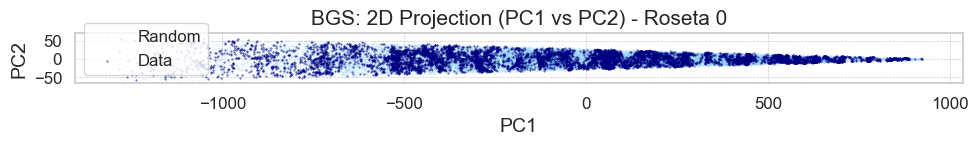

In [13]:
# Visualización 2D mejorada para una roseta
roseta_id = 0
coords_rotated = alignment_data[f"data_{roseta_id}"]
rand_rotated   = alignment_rand[f"rand_{roseta_id}"]

fig, ax = plt.subplots(figsize=(10, 8))

# Randoms 
ax.scatter(rand_rotated[:, 0], rand_rotated[:, 1],
           c='#87CEFA', s=0.1, alpha=0.3, label='Random')  

# Datos reales (al frente más oscuros)
ax.scatter(coords_rotated[:, 0], coords_rotated[:, 1],
           c='navy', s=0.2, alpha=0.7, label='Data')

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title(f'BGS: 2D Projection (PC1 vs PC2) - Roseta {roseta_id}', fontsize=15)

plt.tight_layout()
plt.show()


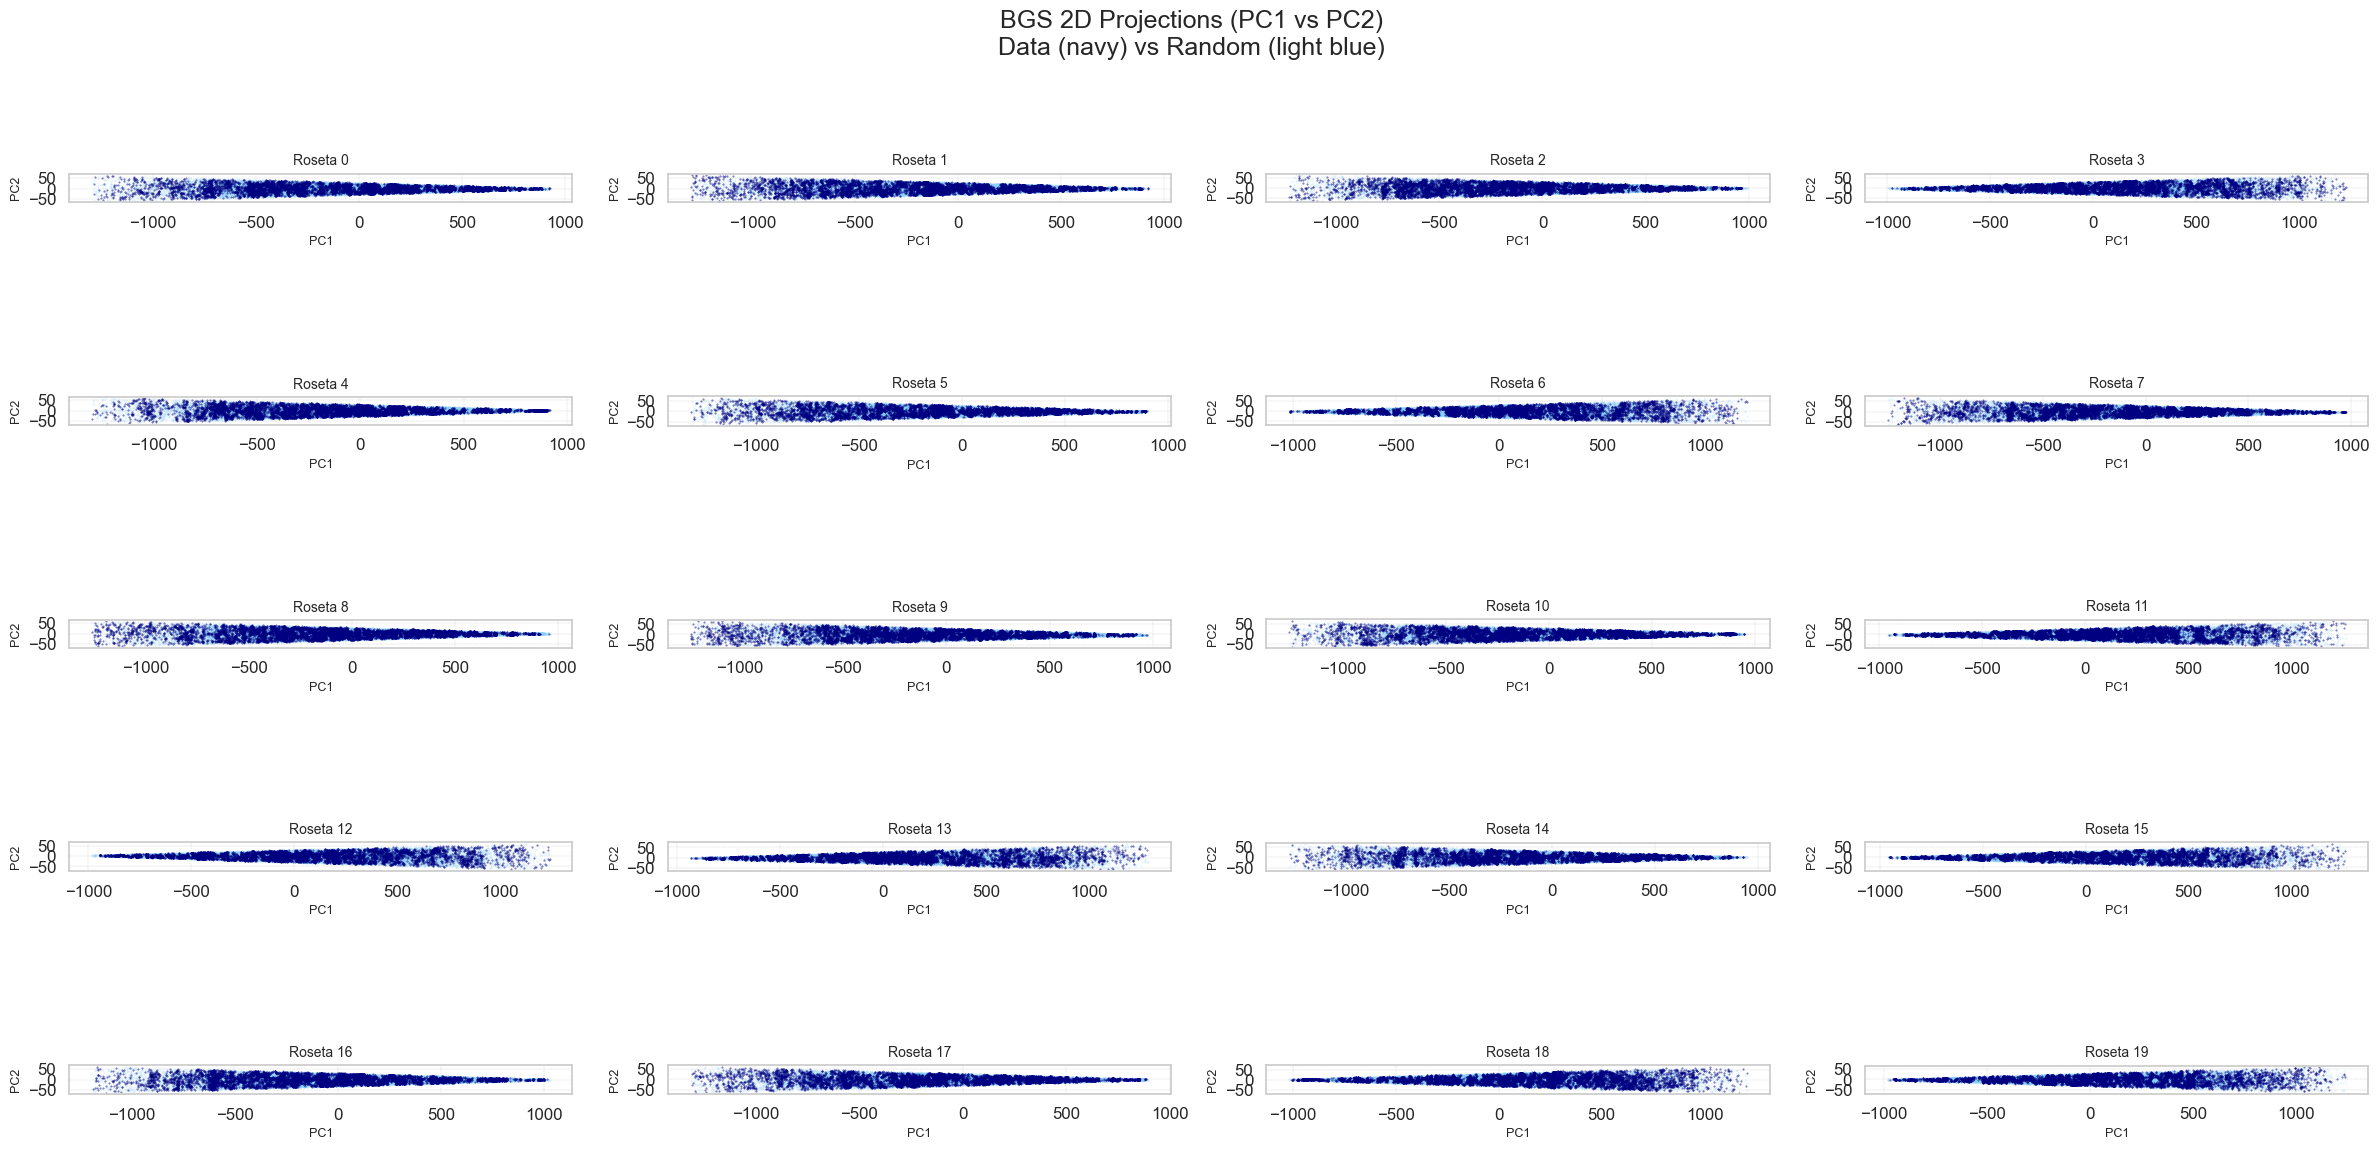

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 4, figsize=(24, 12))  # 5x4 para 20 rosetas
axes = ax.flatten()

for i in range(20):
    ax_i = axes[i]
    data_key = f"data_{i}"
    rand_key = f"rand_{i}"

    coords_rotated = alignment_data[data_key]
    rand_rotated   = alignment_rand[rand_key]

    # Randoms
    ax_i.scatter(rand_rotated[:, 0], rand_rotated[:, 1],
                 c='#87CEFA', s=0.1, alpha=0.3, label='Random')

    # Datos reales 
    ax_i.scatter(coords_rotated[:, 0], coords_rotated[:, 1],
                 c='navy', s=0.2, alpha=0.6, label='Data')

    ax_i.set_title(f'Roseta {i}', fontsize=10)
    ax_i.set_xlabel('PC1', fontsize=9)
    ax_i.set_ylabel('PC2', fontsize=9)
    ax_i.set_aspect('equal', 'box')
    ax_i.grid(True, linestyle='--', linewidth=0.3)

plt.tight_layout(pad=1.0, h_pad=1.2)
fig.suptitle('BGS 2D Projections (PC1 vs PC2)\nData (navy) vs Random (light blue)', fontsize=18, y=1.02)

plt.show()

In [24]:
import os
import matplotlib.pyplot as plt

output_dir = "05_visualizaciones/proyecciones_2D"
os.makedirs(output_dir, exist_ok=True)

# --- Gráfico individual por roseta ---
for i in range(20):
    coords_rotated = alignment_data[f"data_{i}"]
    rand_rotated   = alignment_rand[f"rand_{i}"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(rand_rotated[:, 0], rand_rotated[:, 1],
               c='#87CEFA', s=0.1, alpha=0.3, label='Random')
    ax.scatter(coords_rotated[:, 0], coords_rotated[:, 1],
               c='navy', s=0.2, alpha=0.6, label='Data')

    ax.set_title(f'Roseta {i}', fontsize=12)
    ax.set_xlabel('PC1', fontsize=10)
    ax.set_ylabel('PC2', fontsize=10)
    ax.set_aspect('equal', 'box')
    ax.grid(True, linestyle='--', linewidth=0.3)
    ax.legend(markerscale=5)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"BGS_roseta_{i}_proj2D.png"), dpi=200)
    plt.close()
    print(f"Guardado: BGS_roseta_{i}_proj2D.png")

# --- Figura general con todas las rosetas ---
fig, ax = plt.subplots(5, 4, figsize=(24, 12))
axes = ax.flatten()

for i in range(20):
    ax_i = axes[i]
    coords_rotated = alignment_data[f"data_{i}"]
    rand_rotated   = alignment_rand[f"rand_{i}"]

    ax_i.scatter(rand_rotated[:, 0], rand_rotated[:, 1],
                 c='#87CEFA', s=0.1, alpha=0.3)
    ax_i.scatter(coords_rotated[:, 0], coords_rotated[:, 1],
                 c='navy', s=0.2, alpha=0.6)

    ax_i.set_title(f'Roseta {i}', fontsize=10)
    ax_i.set_xlabel('PC1', fontsize=8)
    ax_i.set_ylabel('PC2', fontsize=8)
    ax_i.set_aspect('equal', 'box')
    ax_i.grid(True, linestyle='--', linewidth=0.3)

plt.tight_layout(pad=1.0, h_pad=1.2)
fig.suptitle('2D Projections (PC1 vs PC2) - Data (navy) & Random (blue)', fontsize=18, y=1.02)

# Guardar panel completo
plt.savefig(os.path.join(output_dir, "BGS_rosetas_all_proj2D.png"), dpi=250, bbox_inches='tight')
plt.close()
print("Guardado: BGS_rosetas_all_proj2D.png (20 rosetas)")


✅ Guardado: BGS_roseta_0_proj2D.png
✅ Guardado: BGS_roseta_1_proj2D.png
✅ Guardado: BGS_roseta_2_proj2D.png
✅ Guardado: BGS_roseta_3_proj2D.png
✅ Guardado: BGS_roseta_4_proj2D.png
✅ Guardado: BGS_roseta_5_proj2D.png
✅ Guardado: BGS_roseta_6_proj2D.png
✅ Guardado: BGS_roseta_7_proj2D.png
✅ Guardado: BGS_roseta_8_proj2D.png
✅ Guardado: BGS_roseta_9_proj2D.png
✅ Guardado: BGS_roseta_10_proj2D.png
✅ Guardado: BGS_roseta_11_proj2D.png
✅ Guardado: BGS_roseta_12_proj2D.png
✅ Guardado: BGS_roseta_13_proj2D.png
✅ Guardado: BGS_roseta_14_proj2D.png
✅ Guardado: BGS_roseta_15_proj2D.png
✅ Guardado: BGS_roseta_16_proj2D.png
✅ Guardado: BGS_roseta_17_proj2D.png
✅ Guardado: BGS_roseta_18_proj2D.png
✅ Guardado: BGS_roseta_19_proj2D.png
✅ Guardado: BGS_rosetas_all_proj2D.png (20 rosetas)


In [15]:
for i in range(20):
    key = f"roseta_{i}"

    df = rosetas_typed[key]

    coords_real = alignment_data[f"data_{i}"]
    coords_rand = alignment_rand[f"rand_{i}"]

    # Verificar tamaños
    n_real = np.sum(~df['RAN'])
    n_rand = np.sum(df['RAN'])

    if len(coords_real) != n_real or len(coords_rand) != n_rand:
        print(f"Tamaño inconsistente en roseta {i}:")
        print(f"   Real: {len(coords_real)} vs {n_real}")
        print(f"   Rand: {len(coords_rand)} vs {n_rand}")
        continue

    # Asignar columnas por separado
    df_real = df[~df['RAN']].copy()
    df_rand = df[df['RAN']].copy()

    df_real[['PC1', 'PC2', 'PC3']] = coords_real
    df_rand[['PC1', 'PC2', 'PC3']] = coords_rand

    # Reunir todo
    rosetas_typed[key] = pd.concat([df_real, df_rand], ignore_index=True)


In [16]:
def plot_2d_filtered_roseta(roseta_id, pc3_slice=(0, 25)):
    types = ['void', 'sheet', 'filament', 'knot']
    titles = ['Void', 'Sheet', 'Filament', 'Knot']

    df = rosetas_typed[f"roseta_{roseta_id}"]
    coords = df[['PC1', 'PC2', 'PC3']].values
    type_labels = df['TYPE'].values
    is_real = ~df['RAN'].values

    fig, ax = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
    axes = ax.flatten()

    for i, t in enumerate(types):
        mask_type = (type_labels == t)
        mask_real = is_real & mask_type
        mask_rand = ~is_real & mask_type

        # Cortes en eje PC3
        mask_real_cut = mask_real & (coords[:, 2] >= pc3_slice[0]) & (coords[:, 2] <= pc3_slice[1])
        mask_rand_cut = mask_rand & (coords[:, 2] >= pc3_slice[0]) & (coords[:, 2] <= pc3_slice[1])

        ax_i = axes[i]
        ax_i.scatter(coords[mask_rand_cut, 0], coords[mask_rand_cut, 1],
                     c='#87CEFA', s=0.5, alpha=0.3, label='Random')
        ax_i.scatter(coords[mask_real_cut, 0], coords[mask_real_cut, 1],
                     c='k', s=0.5, alpha=0.6, label='Real')

        ax_i.set_title(titles[i], fontsize=13)
        ax_i.set_ylabel('PC2', size=11)
        ax_i.set_ylim(-100, 100)
        ax_i.grid(True, linestyle='--', linewidth=0.5)
        ax_i.set_aspect('equal', 'box')

    axes[-1].set_xlabel('PC1', size=12)

    fig.suptitle(f'BGS Roseta {roseta_id} - Slice in PC3 ({pc3_slice[0]} to {pc3_slice[1]} Mpc)', fontsize=17)
    plt.tight_layout()
    plt.show()


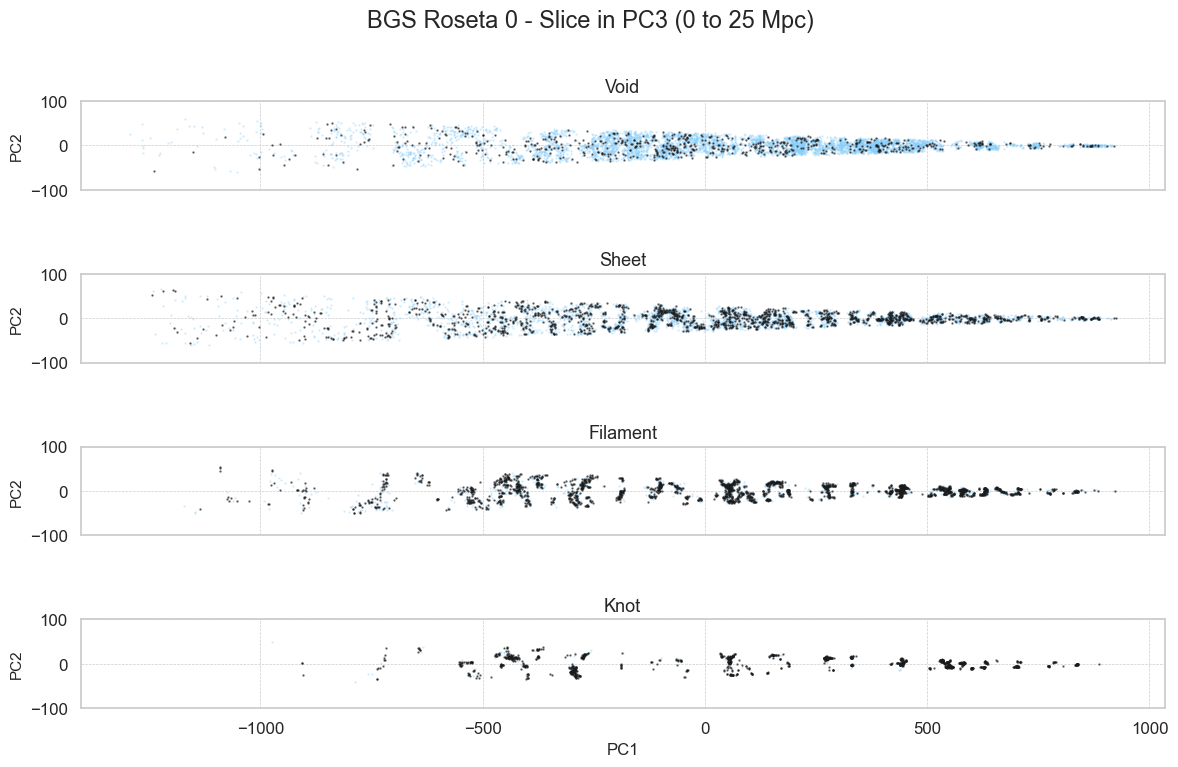

In [17]:
plot_2d_filtered_roseta(0)

In [87]:
def plot_2d_filtered_roseta(roseta_id, pc3_slice=(0, 25)):
    types = ['void', 'sheet', 'filament', 'knot']
    titles = ['Void', 'Sheet', 'Filament', 'Knot']

    df = rosetas_typed[f"roseta_{roseta_id}"]
    coords = df[['PC1', 'PC2', 'PC3']].values
    type_labels = df['TYPE'].values
    is_real = ~df['RAN'].values

    fig, ax = plt.subplots(4, 1, figsize=(12, 8))
    axes = ax.flatten()
    #fig.patch.set_facecolor('black')

    for i, t in enumerate(types):
        mask_type = (type_labels == t)
        mask_real = is_real & mask_type
        mask_rand = ~is_real & mask_type

        # Cortes en eje PC3
        mask_real_cut = mask_real & (coords[:, 2] >= pc3_slice[0]) & (coords[:, 2] <= pc3_slice[1])
        mask_rand_cut = mask_rand & (coords[:, 2] >= pc3_slice[0]) & (coords[:, 2] <= pc3_slice[1])

        ax_i = axes[i]
        ax_i.set_facecolor('white')
        
        # --FOR BLACK BACKGROUND-- #
        #ax_i.scatter(coords[mask_rand_cut, 0], coords[mask_rand_cut, 1],
                     #c='#eab676', s=0.5, alpha=0.3, label='Random')
        #ax_i.scatter(coords[mask_real_cut, 0], coords[mask_real_cut, 1],
                     #c='#abdbe3', s=0.5, alpha=0.6, label='Real')

        ax_i.scatter(coords[mask_rand_cut, 0], coords[mask_rand_cut, 1],
                     #c='#e28743', s=0.5, alpha=0.3, label='Random')
        ax_i.scatter(coords[mask_real_cut, 0], coords[mask_real_cut, 1],
                     c='#063970', s=0.5, alpha=0.6, label='Real')

        ax_i.set_title(titles[i], fontsize=13)
        ax_i.set_ylabel('PC2', size=11)
        ax_i.set_ylim(-100, 100)
        ax_i.grid(True, linestyle='--', linewidth=0.5)
        ax_i.set_aspect('equal', 'box')
        ax_i.set_xlabel('PC1', size=11)  
        axes[-1].tick_params(labelbottom=True)
        #ax_i.tick_params(colors='white')
        #ax_i.xaxis.label.set_color('white')
        #ax_i.yaxis.label.set_color('white')
        #ax_i.title.set_color('white')
        leyend = ax_i.legend(loc='upper right', fontsize=9, facecolor='white')
        #edgecolor='k'
        for text in leyend.get_texts():
            text.set_color('k')

    fig.suptitle(f'BGS_real Roseta {roseta_id} - Slice in PC3 ({pc3_slice[0]} to {pc3_slice[1]} Mpc)', fontsize=17, color='k')
    plt.tight_layout()
    plt.show()

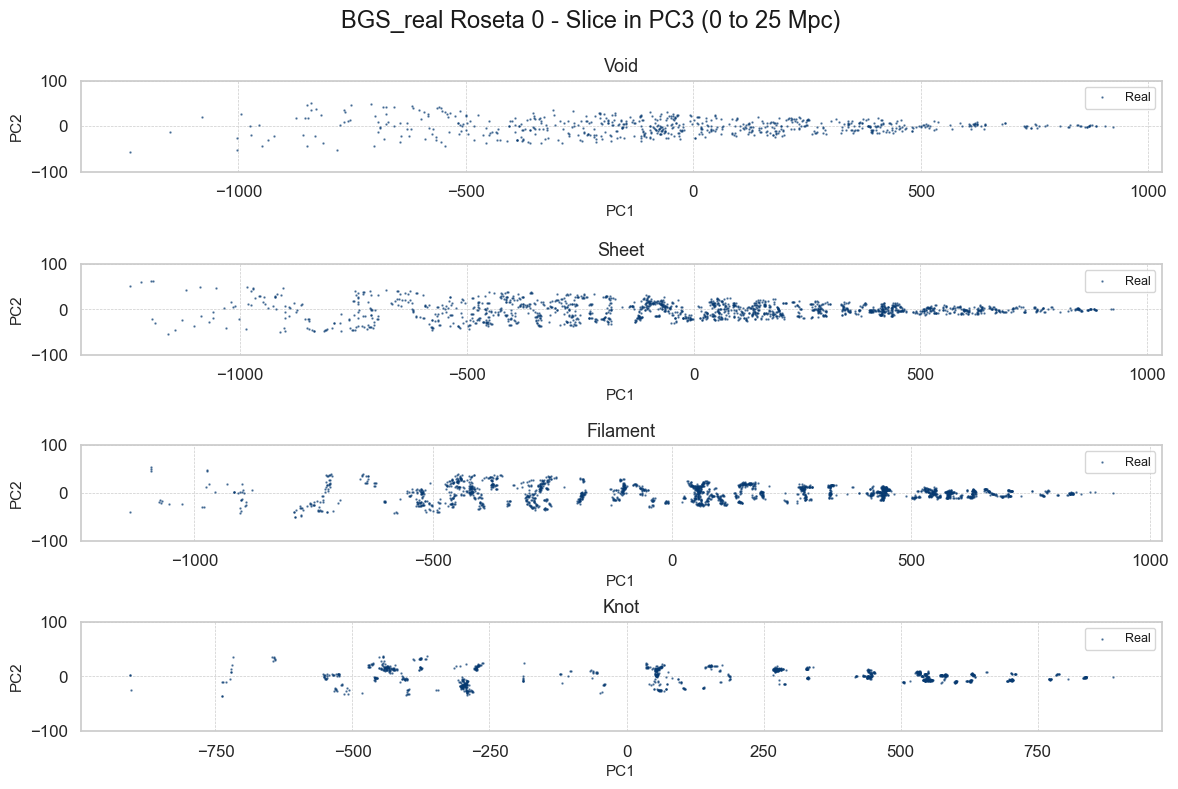

In [88]:
plot_2d_filtered_roseta(0)

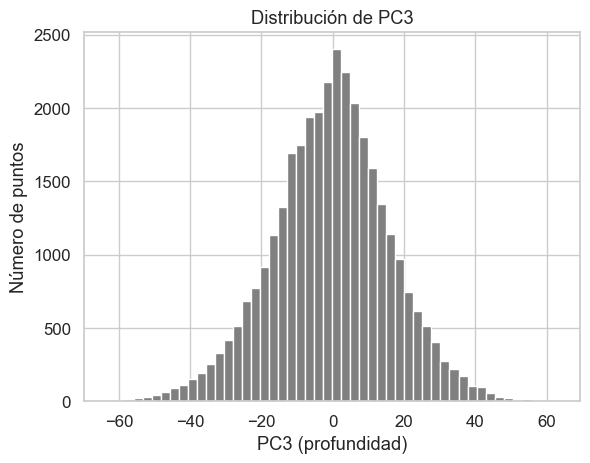

In [28]:
df = rosetas_typed["roseta_3"]  # Cambia por la que estés usando
plt.hist(df['PC3'], bins=50, color='gray')
plt.xlabel('PC3 (profundidad)')
plt.ylabel('Número de puntos')
plt.title('Distribución de PC3')
plt.grid(True)
plt.show()

In [29]:
pc3 = df['PC3'].values
pc3_min, pc3_max = np.min(pc3), np.max(pc3)
mid = (pc3_min + pc3_max) / 2

# Toma una rebanada del 20% central
width = (pc3_max - pc3_min) * 0.2
pc3_slice = (mid - width/2, mid + width/2)
print("Slice recomendado:", pc3_slice)

Slice recomendado: (np.float64(-12.758196467028032), np.float64(12.539119042942364))


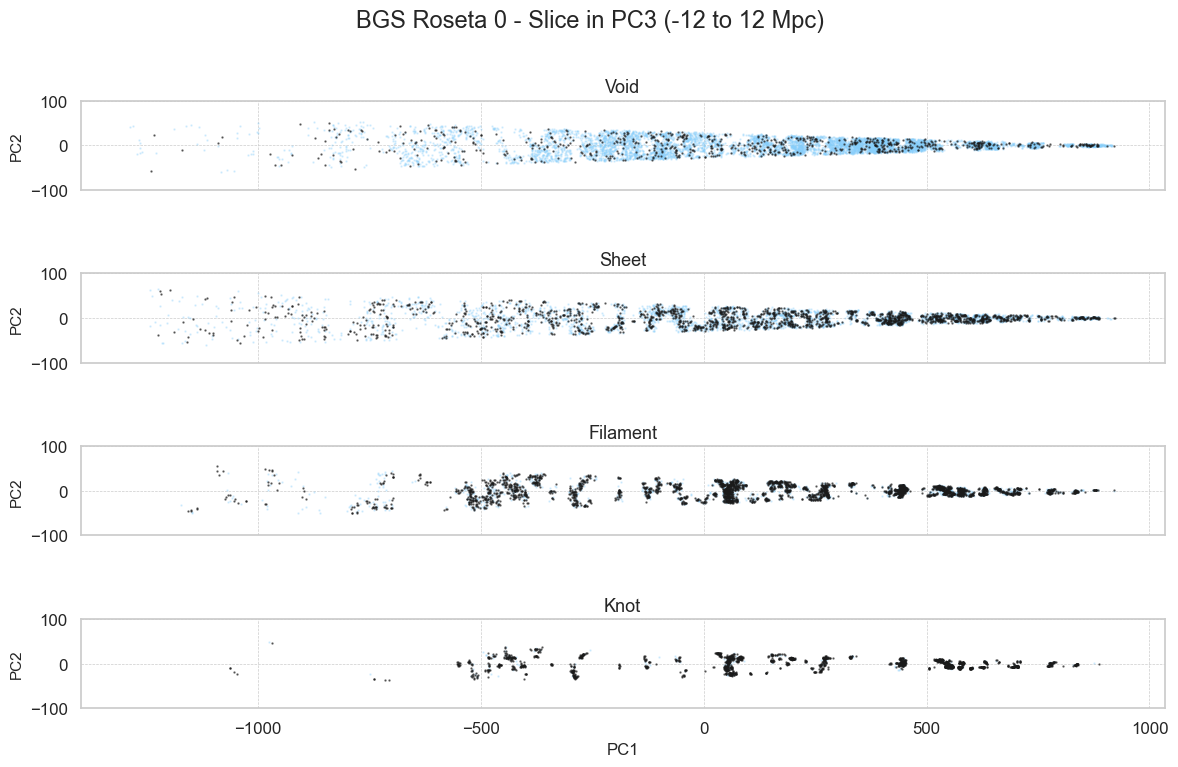

In [18]:
plot_2d_filtered_roseta(0, pc3_slice=(-12, 12))

In [46]:
def plot_2d_classification_all_modes(roseta_id, fixed_slice=(0, 25)):
    types = ['void', 'sheet', 'filament', 'knot']
    titles = ['Void', 'Sheet', 'Filament', 'Knot']

    df = rosetas_typed[f"roseta_{roseta_id}"]
    coords = df[['PC1', 'PC2', 'PC3']].values
    type_labels = df['TYPE'].values
    is_real = ~df['RAN'].values

    # Slice 25%
    pc3 = coords[:, 2]
    pc3_min, pc3_max = np.min(pc3), np.max(pc3)
    mid = (pc3_min + pc3_max) / 2
    dynamic_width = (pc3_max - pc3_min) * 0.25  
    dynamic_slice = (mid - dynamic_width / 2, mid + dynamic_width / 2)

    fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex='col', sharey='row')
    plt.subplots_adjust(hspace=0.5)
    
    slice_titles = ['Completo', f'Slice fijo\nPC3 in {fixed_slice}', f'Slice dinámico\nPC3 in {dynamic_slice[0]:.1f}-{dynamic_slice[1]:.1f}']

    for row, t in enumerate(types):
        mask_type = (type_labels == t)
        mask_real = is_real & mask_type
        mask_rand = ~is_real & mask_type

        for col, (label, pc3_range) in enumerate(zip(
            slice_titles,
            [None, fixed_slice, dynamic_slice]
        )):
            ax = axes[row, col]

            if pc3_range is not None:
                # Aplicar filtro en PC3
                mask_pc3 = (coords[:, 2] >= pc3_range[0]) & (coords[:, 2] <= pc3_range[1])
                mask_real_final = mask_real & mask_pc3
                mask_rand_final = mask_rand & mask_pc3
            else:
                # Sin filtro
                mask_real_final = mask_real
                mask_rand_final = mask_rand

            ax.scatter(coords[mask_rand_final, 0], coords[mask_rand_final, 1],
                       c='#87CEFA', s=0.3, alpha=0.3, label='Random')
            ax.scatter(coords[mask_real_final, 0], coords[mask_real_final, 1],
                       c='k', s=0.3, alpha=0.6, label='Real')

            if row == 0:
                ax.set_title(label, fontsize=11)
            if col == 0:
                ax.set_ylabel(titles[row], fontsize=11)
            ax.set_aspect('equal', 'box')
            ax.grid(True, linestyle='--', linewidth=0.3)

    fig.suptitle(f"Roseta {roseta_id} - ASTRA: Completa vs Slices en PC3", fontsize=16)
    plt.tight_layout()
    plt.show()


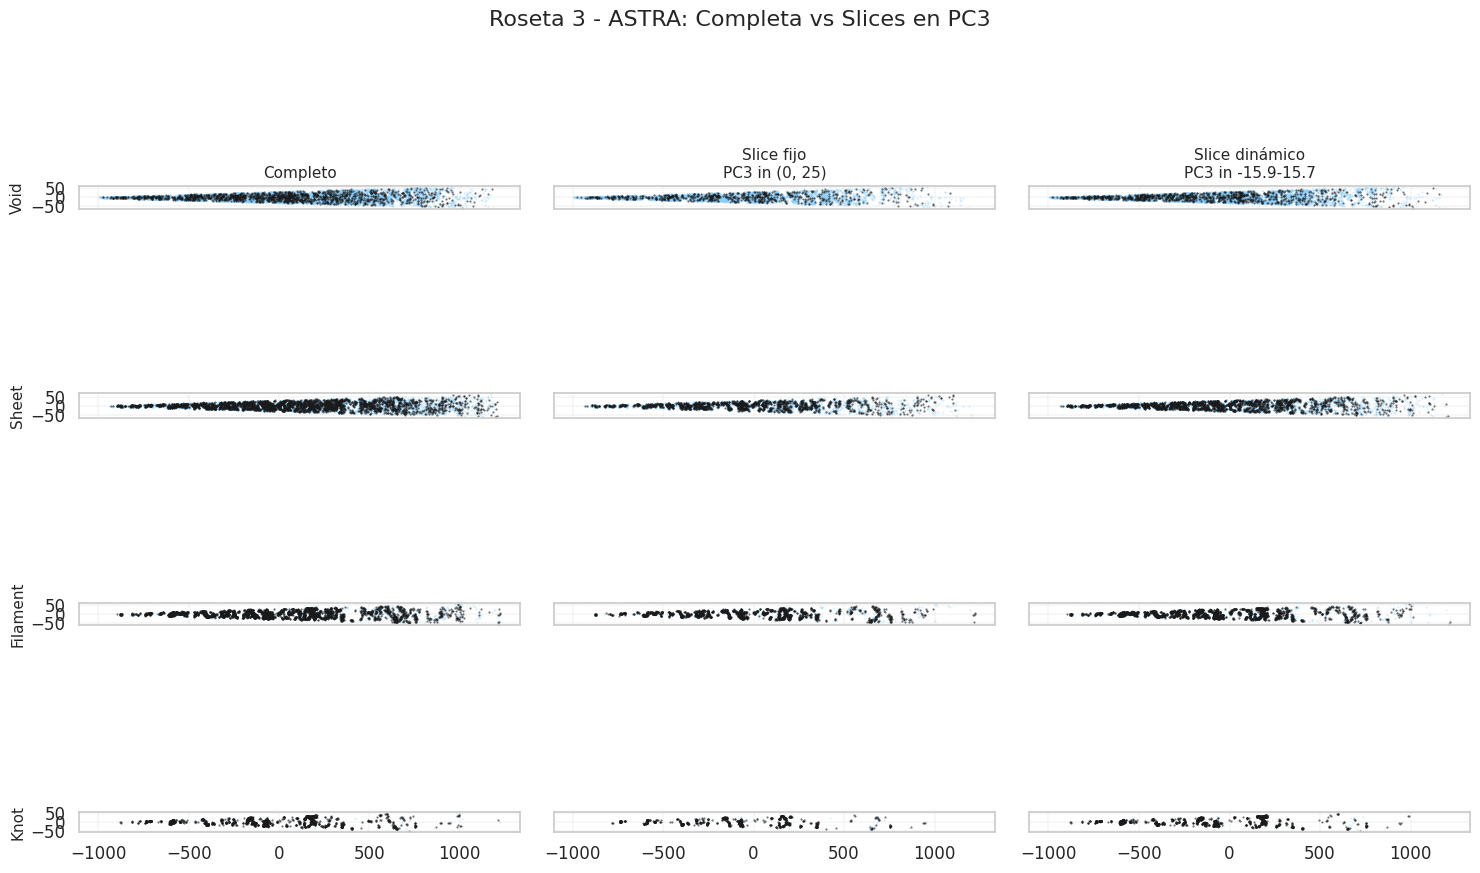

In [47]:
plot_2d_classification_all_modes(3)

In [48]:
import os

local_output = "05_visualizaciones/astra_triple_comparacion"
os.makedirs(local_output, exist_ok=True)

global_output = "../05_visualizaciones/astra_triple_comparacion"
os.makedirs(global_output, exist_ok=True)

print("Local:", os.path.abspath(local_output))
print("Global:", os.path.abspath(global_output))

for roseta_id in range(20):
    df = rosetas_typed[f"roseta_{roseta_id}"]
    coords = df[['PC1', 'PC2', 'PC3']].values
    type_labels = df['TYPE'].values
    is_real = ~df['RAN'].values

    pc3 = coords[:, 2]
    pc3_min, pc3_max = np.min(pc3), np.max(pc3)
    mid = (pc3_min + pc3_max) / 2
    dynamic_width = (pc3_max - pc3_min) * 0.25
    dynamic_slice = (mid - dynamic_width / 2, mid + dynamic_width / 2)
    fixed_slice = (0, 25)

    fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex='col', sharey='row')
    plt.subplots_adjust(hspace=0.5)

    types = ['void', 'sheet', 'filament', 'knot']
    slice_titles = ['Completo', f'Slice fijo\nPC3 in {fixed_slice}', f'Slice dinámico\nPC3 in {dynamic_slice[0]:.1f}-{dynamic_slice[1]:.1f}']

    for row, t in enumerate(types):
        mask_type = (type_labels == t)
        mask_real = is_real & mask_type
        mask_rand = ~is_real & mask_type

        for col, pc3_range in enumerate([None, fixed_slice, dynamic_slice]):
            ax = axes[row, col]

            if pc3_range is not None:
                mask_pc3 = (coords[:, 2] >= pc3_range[0]) & (coords[:, 2] <= pc3_range[1])
                mask_real_final = mask_real & mask_pc3
                mask_rand_final = mask_rand & mask_pc3
            else:
                mask_real_final = mask_real
                mask_rand_final = mask_rand

            ax.scatter(coords[mask_rand_final, 0], coords[mask_rand_final, 1],
                       c='#87CEFA', s=0.3, alpha=0.3, label='Random')
            ax.scatter(coords[mask_real_final, 0], coords[mask_real_final, 1],
                       c='k', s=0.3, alpha=0.6, label='Real')

            if row == 0:
                ax.set_title(slice_titles[col], fontsize=11)
            if col == 0:
                ax.set_ylabel(t, fontsize=11)
            ax.set_aspect('equal', 'box')
            ax.grid(True, linestyle='--', linewidth=0.3)

    fig.suptitle(f"BGS: Roseta {roseta_id} - ASTRA: Completa vs Slices en PC3", fontsize=16)
    plt.tight_layout()

    filename = f"roseta_{roseta_id}_clasificacion_triple.png"

    # Guardar en ambas ubicaciones
    plt.savefig(os.path.join(local_output, filename), dpi=200)
    plt.savefig(os.path.join(global_output, filename), dpi=200)
    plt.close()

    print(f"Guardado: {filename}")


📁 Local: C:\Users\USUARIO\Desktop\CosmicWeb_BGS_ASTRA\04_clasificacion\05_visualizaciones\astra_triple_comparacion
📁 Global: C:\Users\USUARIO\Desktop\CosmicWeb_BGS_ASTRA\05_visualizaciones\astra_triple_comparacion
✅ Guardado: roseta_0_clasificacion_triple.png
✅ Guardado: roseta_1_clasificacion_triple.png
✅ Guardado: roseta_2_clasificacion_triple.png
✅ Guardado: roseta_3_clasificacion_triple.png
✅ Guardado: roseta_4_clasificacion_triple.png
✅ Guardado: roseta_5_clasificacion_triple.png
✅ Guardado: roseta_6_clasificacion_triple.png
✅ Guardado: roseta_7_clasificacion_triple.png
✅ Guardado: roseta_8_clasificacion_triple.png
✅ Guardado: roseta_9_clasificacion_triple.png
✅ Guardado: roseta_10_clasificacion_triple.png
✅ Guardado: roseta_11_clasificacion_triple.png
✅ Guardado: roseta_12_clasificacion_triple.png
✅ Guardado: roseta_13_clasificacion_triple.png
✅ Guardado: roseta_14_clasificacion_triple.png
✅ Guardado: roseta_15_clasificacion_triple.png
✅ Guardado: roseta_16_clasificacion_triple.p

In [31]:
import os

local_output = "05_visualizaciones/astra_slice_fijo_PC3_0_25"
os.makedirs(local_output, exist_ok=True)

# Carpeta global del proyecto
global_output = "../05_visualizaciones/astra_slice_fijo_PC3_0_25"
os.makedirs(global_output, exist_ok=True)

print("Local:", os.path.abspath(local_output))
print("Global:", os.path.abspath(global_output))

fixed_slice = (0, 25)
types = ['void', 'sheet', 'filament', 'knot']

for roseta_id in range(20):
    df = rosetas_typed[f"roseta_{roseta_id}"]
    coords = df[['PC1', 'PC2', 'PC3']].values
    type_labels = df['TYPE'].values
    is_real = ~df['RAN'].values

    fig, ax = plt.subplots(4, 1, figsize=(10, 8),)
    axes = ax.flatten()

    for i, t in enumerate(types):
        mask_type = (type_labels == t)
        mask_real = is_real & mask_type
        mask_rand = ~is_real & mask_type

        mask_pc3 = (coords[:, 2] >= fixed_slice[0]) & (coords[:, 2] <= fixed_slice[1])
        mask_real_final = mask_real & mask_pc3
        mask_rand_final = mask_rand & mask_pc3

        axes[i].scatter(coords[mask_rand_final, 0], coords[mask_rand_final, 1],
                        c='#87CEFA', s=0.3, alpha=0.3, label='Random')
        axes[i].scatter(coords[mask_real_final, 0], coords[mask_real_final, 1],
                        c='k', s=0.3, alpha=0.6, label='Real')

        axes[i].set_title(t.capitalize())
        axes[i].set_ylabel('PC2')
        axes[i].grid(True, linestyle='--', linewidth=0.3)
        axes[i].set_aspect('equal', 'box')

    axes[-1].set_xlabel('PC1')
    fig.suptitle(f"BGS: Roseta {roseta_id} - Slice fijo PC3 in {fixed_slice}", fontsize=16)
    plt.tight_layout()

    filename = f"roseta_{roseta_id}_slice_PC3_0_25.png"
    plt.savefig(os.path.join(local_output, filename), dpi=200)
    plt.savefig(os.path.join(global_output, filename), dpi=200)
    plt.close()

    print(f"Guardado: {filename}")


Local: C:\Users\USUARIO\Desktop\CosmicWeb_BGS_ASTRA\04_clasificacion\05_visualizaciones\astra_slice_fijo_PC3_0_25
Global: C:\Users\USUARIO\Desktop\CosmicWeb_BGS_ASTRA\05_visualizaciones\astra_slice_fijo_PC3_0_25
Guardado: roseta_0_slice_PC3_0_25.png
Guardado: roseta_1_slice_PC3_0_25.png
Guardado: roseta_2_slice_PC3_0_25.png
Guardado: roseta_3_slice_PC3_0_25.png
Guardado: roseta_4_slice_PC3_0_25.png
Guardado: roseta_5_slice_PC3_0_25.png
Guardado: roseta_6_slice_PC3_0_25.png
Guardado: roseta_7_slice_PC3_0_25.png
Guardado: roseta_8_slice_PC3_0_25.png
Guardado: roseta_9_slice_PC3_0_25.png
Guardado: roseta_10_slice_PC3_0_25.png
Guardado: roseta_11_slice_PC3_0_25.png
Guardado: roseta_12_slice_PC3_0_25.png
Guardado: roseta_13_slice_PC3_0_25.png
Guardado: roseta_14_slice_PC3_0_25.png
Guardado: roseta_15_slice_PC3_0_25.png
Guardado: roseta_16_slice_PC3_0_25.png
Guardado: roseta_17_slice_PC3_0_25.png
Guardado: roseta_18_slice_PC3_0_25.png
Guardado: roseta_19_slice_PC3_0_25.png


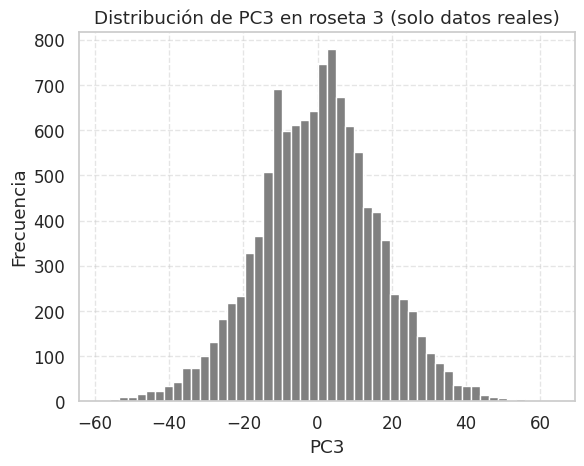

In [56]:
df = rosetas_typed['roseta_3']
df_real = df[~df['RAN']]  # Solo puntos reales
df_real['PC3'].hist(bins=50, color='gray')
plt.title("Distribución de PC3 en roseta 3 (solo datos reales)")
plt.xlabel("PC3")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [57]:

plt.rcParams['font.family'] = 'DejaVu Sans'
coord_f_real, coord_s_real, coord_v_real, coord_k_real = {}, {}, {}, {}

# Recorrer todas las rosetas en rosetas_typed
for roseta_key, df in rosetas_typed.items():
    if 'RAN' not in df.columns or 'TYPE' not in df.columns:
        print(f"Saltando {roseta_key} por falta de columnas.")
        continue

    # Máscara de puntos reales
    is_real = ~df['RAN'].values

    # Coordenadas rotadas
    if not all(k in df.columns for k in ['PC1', 'PC2', 'PC3']):
        print(f"{roseta_key} no tiene PC1/PC2/PC3")
        continue

    coords = df[['PC1', 'PC2', 'PC3']].values
    labels = df['TYPE'].values

    for class_code, target_dict in zip(['filament', 'sheet', 'void', 'knot'],
                                   [coord_f_real, coord_s_real, coord_v_real, coord_k_real]):
        mask = (labels == class_code) & is_real
        if mask.sum() > 0:
            target_dict[roseta_key] = coords[mask]


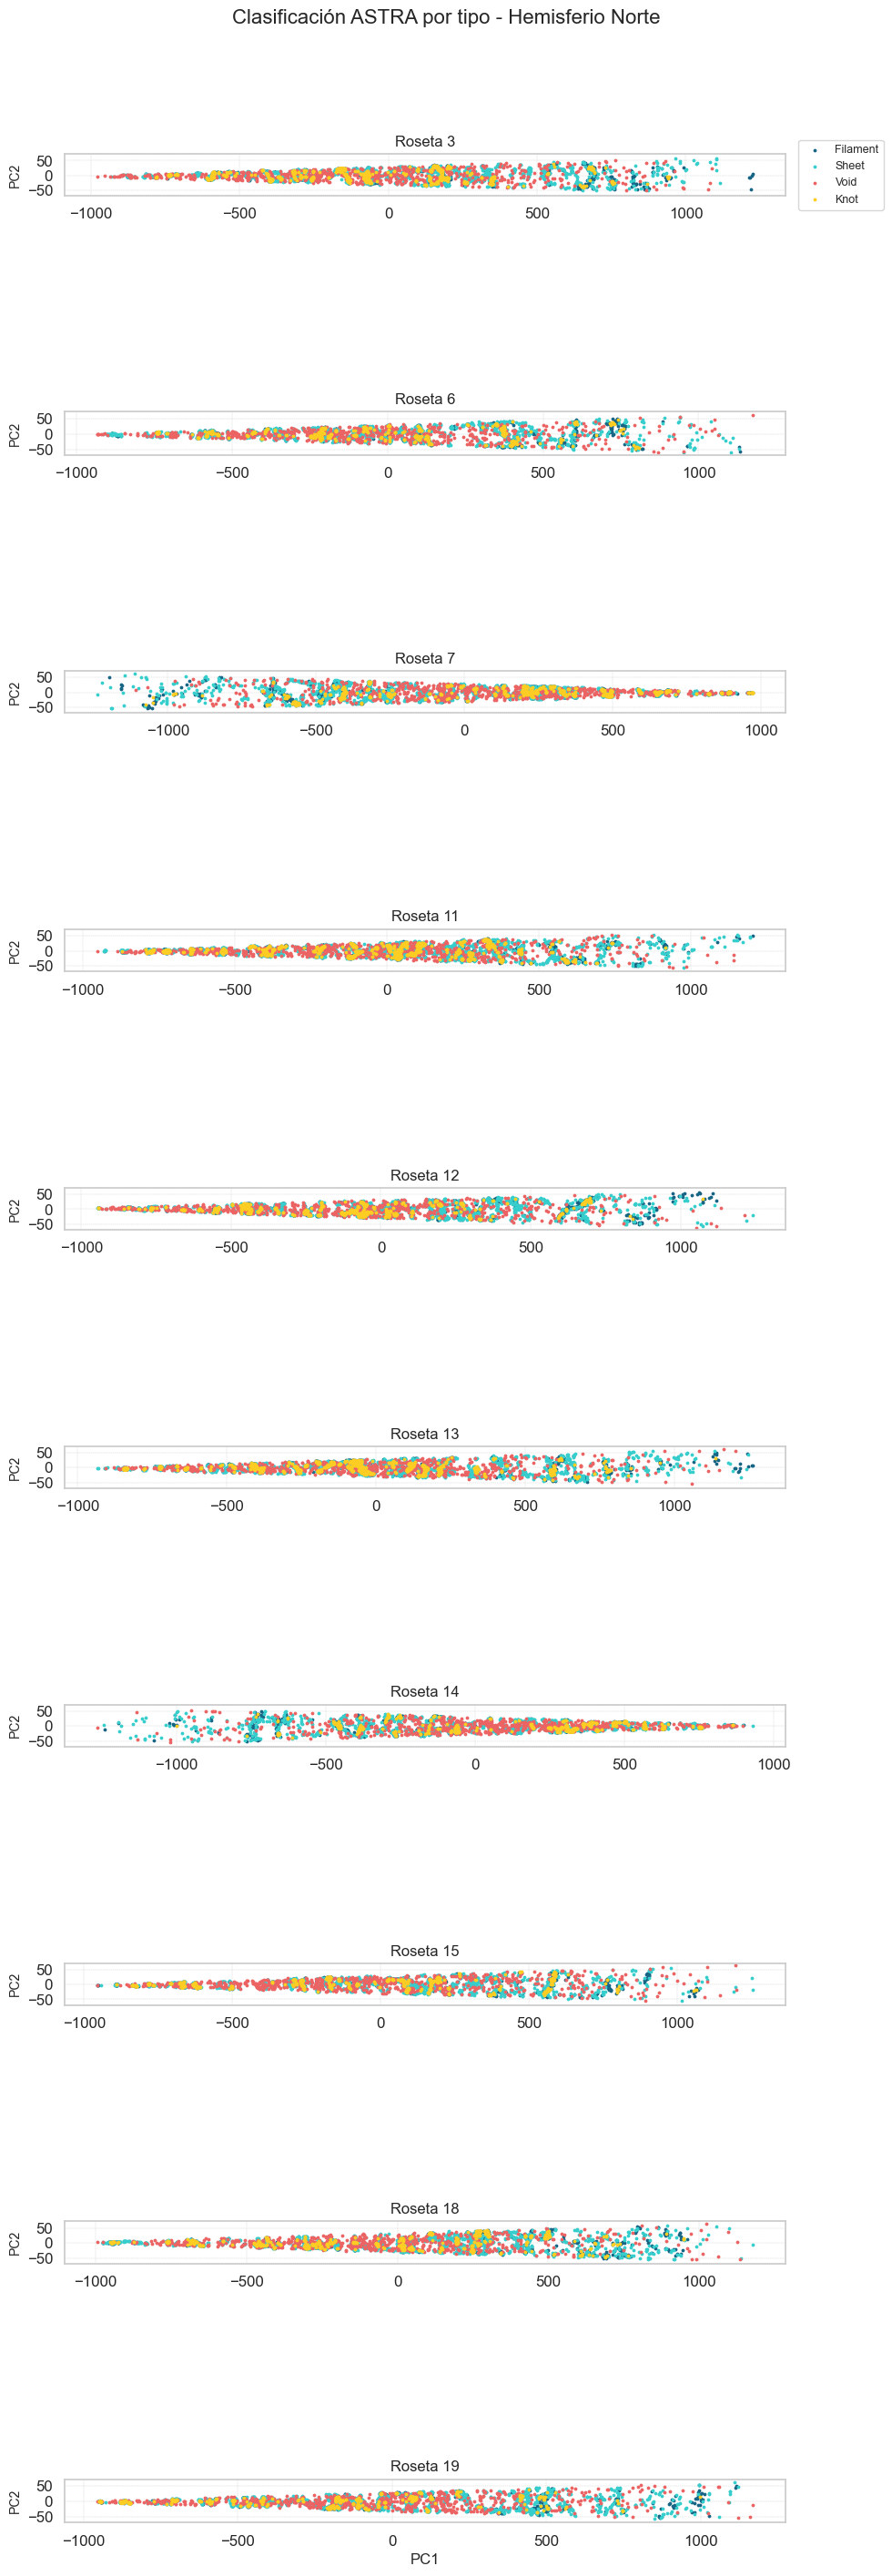

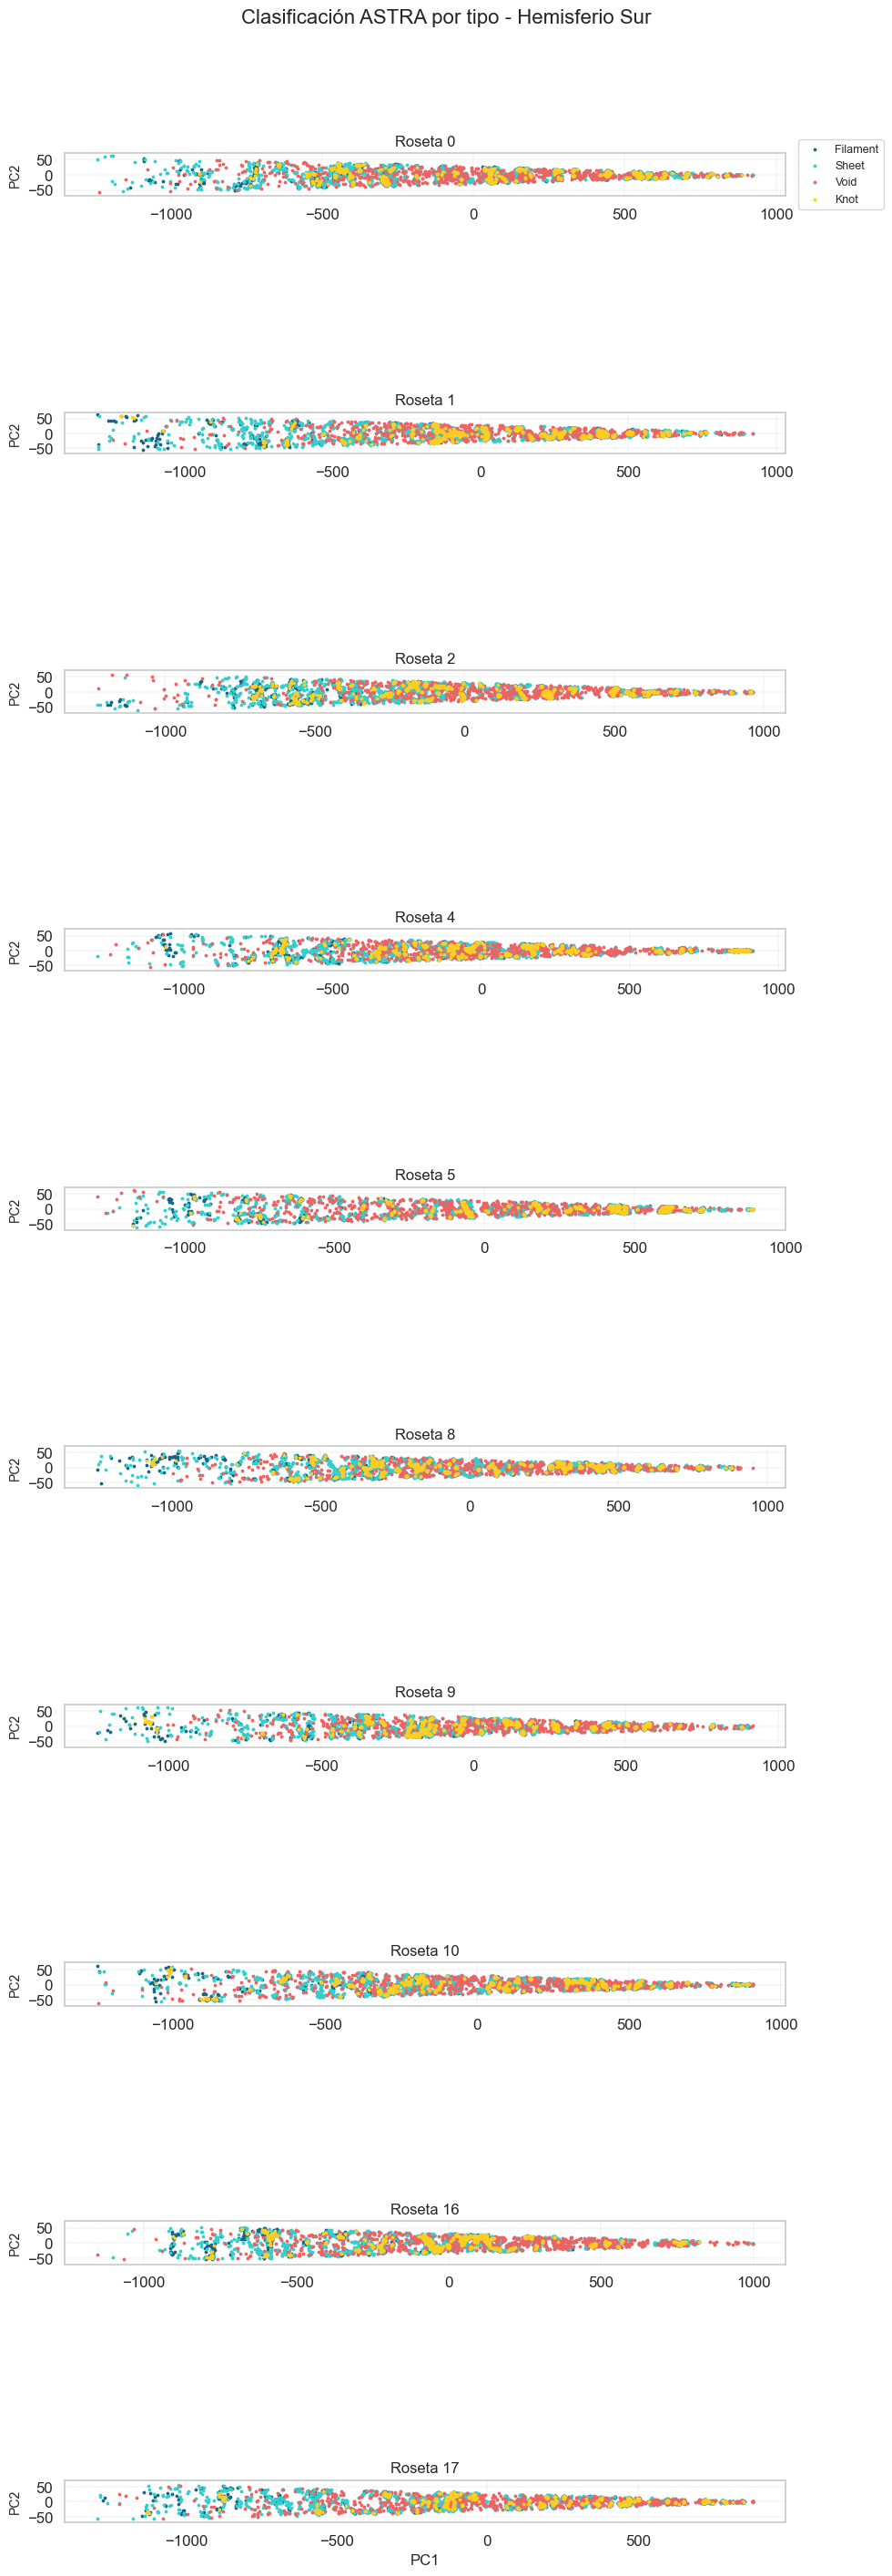

In [32]:
import matplotlib.pyplot as plt
import os

# Configuración
pc3_slice = (0, 25)  # Corte en PC3
titles = ['Filament', 'Sheet', 'Void', 'Knot']
classes = ['filament', 'sheet', 'void', 'knot']
colors = ['#176585', '#36cecc', '#ec6363', '#fecd23']

def plot_rosetas_por_hemisferio(hemisferio_rosetas, nombre_hemisferio):
    fig, axes = plt.subplots(len(hemisferio_rosetas), 1, figsize=(10, 30), sharey=True)

    if len(hemisferio_rosetas) == 1:
        axes = [axes]  

    for i, roseta in enumerate(hemisferio_rosetas):
        ax = axes[i]
        roseta_key = f'roseta_{roseta}'
        hay_datos = False

        for class_code, color, label in zip(classes, colors, titles):
            try:
                coords = rosetas_typed[roseta_key]
                is_real = ~coords['RAN'].values
                tipo_mask = coords['TYPE'].values == class_code
                pc3 = coords['PC3'].values
                mask_pc3 = (pc3 >= pc3_slice[0]) & (pc3 <= pc3_slice[1])

                full_mask = is_real & tipo_mask & mask_pc3
                xyz = coords[['PC1', 'PC2']].values[full_mask]

                if len(xyz) > 0:
                    hay_datos = True
                    ax.scatter(xyz[:, 0], xyz[:, 1], s=3, c=color, label=label)
            except Exception as e:
                print(f"Roseta {roseta} tipo {class_code}: {e}")

        ax.set_ylabel('PC2', fontsize=10)
        ax.set_title(f"Roseta {roseta}", fontsize=12)
        ax.grid(True, linestyle='--', linewidth=0.3)
        ax.set_aspect('equal')

        if i == 0:
            ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=9)

    axes[-1].set_xlabel('PC1', fontsize=12)
    plt.suptitle(f"Clasificación ASTRA por tipo - Hemisferio {nombre_hemisferio}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Listas de rosetas
north_rosetas = [3, 6, 7, 11, 12, 13, 14, 15, 18, 19]
south_rosetas = [0, 1, 2, 4, 5, 8, 9, 10, 16, 17]

# Ejecutar visualización
plot_rosetas_por_hemisferio(north_rosetas, 'Norte')
plot_rosetas_por_hemisferio(south_rosetas, 'Sur')


In [33]:
import matplotlib.pyplot as plt
import os

# Configuración de colores y clases
pc3_slice = (0, 25)  # Corte en PC3
titles = ['Filament', 'Sheet', 'Void', 'Knot']
classes = ['filament', 'sheet', 'void', 'knot']
colors = ['#176585', '#36cecc', '#ec6363', '#fecd23']

# Ruta de guardado global
save_dir = os.path.join("..", "05_visualizaciones", "clasificacion_estructuras_PC3_0_25")
os.makedirs(save_dir, exist_ok=True)

def exportar_rosetas_por_hemisferio(hemisferio_rosetas, nombre_hemisferio):
    fig, axes = plt.subplots(len(hemisferio_rosetas), 1, figsize=(10, 30), sharey=True)

    if len(hemisferio_rosetas) == 1:
        axes = [axes]  # Asegurar que sea iterable

    for i, roseta in enumerate(hemisferio_rosetas):
        ax = axes[i]
        roseta_key = f'roseta_{roseta}'
        hay_datos = False

        for class_code, color, label in zip(classes, colors, titles):
            try:
                coords = rosetas_typed[roseta_key]
                is_real = ~coords['RAN'].values
                tipo_mask = coords['TYPE'].values == class_code
                pc3 = coords['PC3'].values
                mask_pc3 = (pc3 >= pc3_slice[0]) & (pc3 <= pc3_slice[1])

                full_mask = is_real & tipo_mask & mask_pc3
                xyz = coords[['PC1', 'PC2']].values[full_mask]

                if len(xyz) > 0:
                    hay_datos = True
                    ax.scatter(xyz[:, 0], xyz[:, 1], s=3, c=color, label=label)
            except Exception as e:
                print(f"Roseta {roseta} tipo {class_code}: {e}")

        ax.set_ylabel('PC2', fontsize=10)
        ax.set_title(f"Roseta {roseta}", fontsize=12)
        ax.grid(True, linestyle='--', linewidth=0.3)
        ax.set_aspect('equal')

        if i == 0:
            ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=9)

    axes[-1].set_xlabel('PC1', fontsize=12)
    plt.suptitle(f"Clasificación ASTRA por tipo - Hemisferio {nombre_hemisferio}", fontsize=16)
    plt.tight_layout()

    # Exportar figura
    save_name = f"clasificacion_{nombre_hemisferio.lower()}_PC3_0_25.png"
    full_path = os.path.join(save_dir, save_name)
    plt.savefig(full_path, dpi=300)
    plt.close()
    print(f"Guardado: {full_path}")

# Listas de rosetas
north_rosetas = [3, 6, 7, 11, 12, 13, 14, 15, 18, 19]
south_rosetas = [0, 1, 2, 4, 5, 8, 9, 10, 16, 17]

# Ejecutar exportación
exportar_rosetas_por_hemisferio(north_rosetas, 'Norte')
exportar_rosetas_por_hemisferio(south_rosetas, 'Sur')


Guardado: ..\05_visualizaciones\clasificacion_estructuras_PC3_0_25\clasificacion_norte_PC3_0_25.png
Guardado: ..\05_visualizaciones\clasificacion_estructuras_PC3_0_25\clasificacion_sur_PC3_0_25.png


Imagen guardada en: 05_visualizaciones/cdf_comparacion\cdf_r_comparacion.png


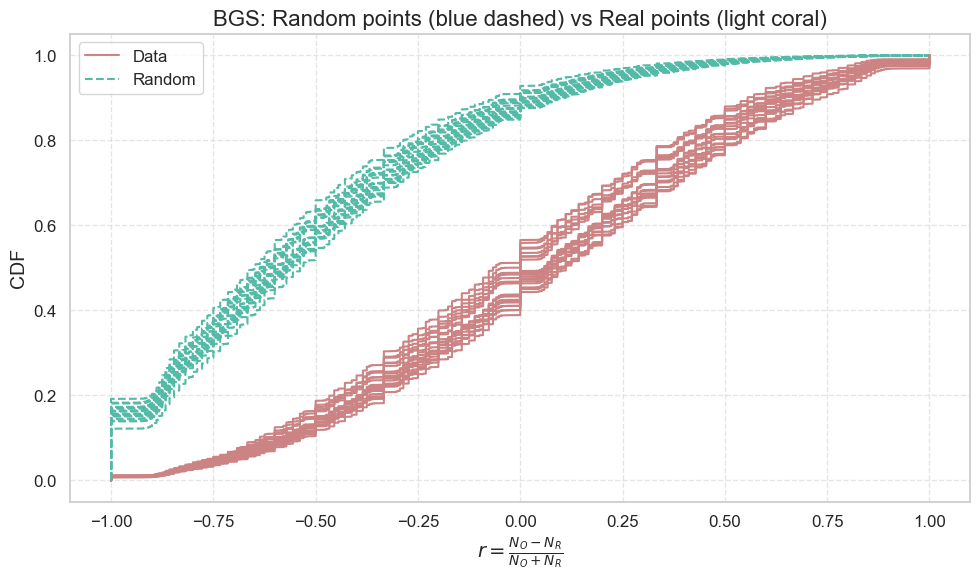

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
import os

output_dir = "05_visualizaciones/cdf_comparacion"
os.makedirs(output_dir, exist_ok=True)


for key, df in rosetas_r.items():
    if 'r' not in df.columns or 'RAN' not in df.columns:
        print(f"Roseta {key} no contiene columna 'r' o 'RAN'.")
        continue

    # Ordenar valores
    sort_all = df['r'].sort_values()
    sort_data = df[~df['RAN']]['r'].sort_values()
    sort_rand = df[df['RAN']]['r'].sort_values()

    # CDFs
    cdf_all = np.arange(1, len(sort_all)+1) / len(sort_all)
    cdf_data = np.arange(1, len(sort_data)+1) / len(sort_data)
    cdf_rand = np.arange(1, len(sort_rand)+1) / len(sort_rand)

    # Graficar
    ax.plot(sort_data, cdf_data, color='#cc8383', label='Data' if key=='roseta_3' else "")
    ax.plot(sort_rand, cdf_rand, linestyle='--', color='#52baa7', label='Random' if key=='roseta_3' else "")

# Ejes y etiquetas
ax.set_xlabel(r'$r = \frac{N_O - N_R}{N_O + N_R}$', fontsize=14)
ax.set_ylabel('CDF', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('BGS: Random points (blue dashed) vs Real points (light coral)', fontsize=16)

ax.legend()
plt.tight_layout()

save_path = os.path.join(output_dir, "cdf_r_comparacion.png")
fig.savefig(save_path, dpi=300)
print(f"Imagen guardada en: {save_path}")

plt.show()


In [61]:
from collections import defaultdict

def get_fracs(rosetas_typed, tipo_punto='real'):
    total = 0
    count = defaultdict(int)

    for key, df in rosetas_typed.items():
        if 'RAN' not in df.columns or 'TYPE' not in df.columns:
            continue

        if tipo_punto == 'real':
            mask = ~df['RAN']
        elif tipo_punto == 'rand':
            mask = df['RAN']
        else:
            raise ValueError("tipo_punto debe ser 'real' o 'rand'")

        total += mask.sum()

        for tipo in ['void', 'sheet', 'filament', 'knot']:
            count[tipo] += ((df['TYPE'] == tipo) & mask).sum()

    # Fracción en porcentaje con formato
    fracs = []
    for tipo in ['void', 'sheet', 'filament', 'knot']:
        frac = count[tipo] / total * 100 if total else 0
        fracs.append(f"({frac:.2f} ± 0.00)%")
    
    return fracs

# Obtener resultados para objetos y randoms
row_obj = get_fracs(rosetas_typed, tipo_punto='real')
row_rand = get_fracs(rosetas_typed, tipo_punto='rand')

# Crear tabla como en el paper
import pandas as pd

tabla_bgs = pd.DataFrame([
    ['BGSobj'] + row_obj,
    ['BGSrand'] + row_rand
], columns=['Catalog', 'Voids', 'Sheets', 'Filaments', 'Knots'])

# Mostrar
tabla_bgs


Catalog            Voids           Sheets        Filaments            Knots
0   BGSobj  (12.73 ± 0.00)%  (31.19 ± 0.00)%  (36.74 ± 0.00)%  (19.33 ± 0.00)%
1  BGSrand  (57.15 ± 0.00)%  (30.27 ± 0.00)%  (10.84 ± 0.00)%   (1.74 ± 0.00)%

In [62]:
import numpy as np
from collections import defaultdict
import pandas as pd

def get_fracs_mc(rosetas_typed, tipo_punto='real', n_iter=10, sample_frac=0.3):
    tipos = ['void', 'sheet', 'filament', 'knot']
    fracs_dict = {tipo: [] for tipo in tipos}

    for _ in range(n_iter):
        total = 0
        count = defaultdict(int)

        for key, df in rosetas_typed.items():
            if 'RAN' not in df.columns or 'TYPE' not in df.columns:
                continue

            if tipo_punto == 'real':
                df_sample = df[~df['RAN']]
            elif tipo_punto == 'rand':
                df_sample = df[df['RAN']]
            else:
                raise ValueError("tipo_punto debe ser 'real' o 'rand'")

            # Samplea una fracción aleatoria para simular variación
            if len(df_sample) == 0:
                continue
            df_sample = df_sample.sample(frac=sample_frac)

            total += len(df_sample)

            for tipo in tipos:
                count[tipo] += (df_sample['TYPE'] == tipo).sum()

        for tipo in tipos:
            frac = count[tipo] / total * 100 if total else 0
            fracs_dict[tipo].append(frac)

    # Formateo como en el paper
    resumen = []
    for tipo in tipos:
        vals = np.array(fracs_dict[tipo])
        media = np.mean(vals)
        std = np.std(vals)
        resumen.append(f"({media:.2f} ± {std:.2f})%")

    return resumen

# Ejecutar
row_obj = get_fracs_mc(rosetas_typed, tipo_punto='real', n_iter=10)
row_rand = get_fracs_mc(rosetas_typed, tipo_punto='rand', n_iter=10)

tabla_bgs = pd.DataFrame([
    ['BGSobj'] + row_obj,
    ['BGSrand'] + row_rand
], columns=['Catalog', 'Voids', 'Sheets', 'Filaments', 'Knots'])

# Mostrar
tabla_bgs


Catalog            Voids           Sheets        Filaments            Knots
0   BGSobj  (12.76 ± 0.07)%  (31.18 ± 0.12)%  (36.74 ± 0.12)%  (19.32 ± 0.13)%
1  BGSrand  (57.17 ± 0.13)%  (30.29 ± 0.10)%  (10.82 ± 0.10)%   (1.73 ± 0.03)%

In [63]:
import os
from astropy.table import Table
import matplotlib.pyplot as plt

subfolder = "05_visualizaciones/tablas_fracciones"
os.makedirs(subfolder, exist_ok=True)

t_bgs = Table.from_pandas(tabla_bgs)
t_bgs.write(os.path.join(subfolder, "tabla_BGS.ecsv"), format='ascii.ecsv', overwrite=True)

def guardar_tabla_como_imagen(df, path, title=None):
    fig, ax = plt.subplots(figsize=(10, 2.5))
    ax.axis('off')
    tabla = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    tabla.scale(1.2, 1.8)
    if title:
        plt.title(title, fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.close()

guardar_tabla_como_imagen(tabla_bgs,
                          os.path.join(subfolder, "tabla_BGS.png"),
                          title="BGS: Fracciones por estructura (real vs random)")

print("Tabla guardada como .ecsv y .png en:", subfolder)


Tabla guardada como .ecsv y .png en: 05_visualizaciones/tablas_fracciones


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparación de tipo cósmico real vs random con mismo tamaño
def plot_comparison_matched(rosetas_typed):
    tipos = ['void', 'sheet', 'filament', 'knot']
    total_reales = []
    total_randoms = []

    for tipo in tipos:
        reales = []
        randoms = []
        for df in rosetas_typed.values():
            if 'RAN' not in df.columns or 'TYPE' not in df.columns:
                continue
            df_real = df[(~df['RAN']) & (df['TYPE'] == tipo)]
            df_rand = df[(df['RAN']) & (df['TYPE'] == tipo)]

            # Match sample size
            n = min(len(df_real), len(df_rand))
            reales.append(df_real.sample(n=n)['TYPE'])
            randoms.append(df_rand.sample(n=n)['TYPE'])

        total_reales.extend(pd.concat(reales))
        total_randoms.extend(pd.concat(randoms))

    # Crear DataFrame para graficar
    df_plot = pd.DataFrame({
        'TYPE': total_reales + total_randoms,
        'SOURCE': ['real'] * len(total_reales) + ['random'] * len(total_randoms)
    })

    # Graficar
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_plot, x='TYPE', hue='SOURCE', stat='count',
                 multiple='dodge', shrink=0.8, palette={'real': 'indianred', 'random': 'black'})
    plt.title('Distribución por tipo cósmico: Real vs Random (mismo tamaño)')
    plt.ylabel('Cantidad')
    plt.xlabel('Tipo cósmico')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [10]:
plot_comparison_matched(rosetas_typed)

NameError: name 'rosetas_typed' is not defined

In [7]:
def plot_r_histogram_with_debug(df, bins=50):
    import numpy as np
    import matplotlib.pyplot as plt

    if not {'X', 'Y', 'Z', 'RAN'}.issubset(df.columns):
        raise ValueError("Faltan columnas necesarias (X, Y, Z, RAN)")

    df_real = df[df['RAN'] == False].copy()
    df_rand = df[df['RAN'] == True].copy()

    print(f"Reales: {len(df_real)} puntos | Randoms: {len(df_rand)} puntos")

    # Emparejar tamaños
    n_points = min(len(df_real), len(df_rand))
    df_real_sampled = df_real.sample(n=n_points, random_state=0)
    df_rand_sampled = df_rand.sample(n=n_points, random_state=0)

    # Calcular r
    r_real = np.sqrt(df_real_sampled['X']**2 + df_real_sampled['Y']**2 + df_real_sampled['Z']**2)
    r_rand = np.sqrt(df_rand_sampled['X']**2 + df_rand_sampled['Y']**2 + df_rand_sampled['Z']**2)

    print(f"R rango real: {r_real.min():.2f} – {r_real.max():.2f}")
    print(f"R rango random: {r_rand.min():.2f} – {r_rand.max():.2f}")

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.hist(r_rand, bins=bins, alpha=0.5, label='Random', color='black')
    plt.hist(r_real, bins=bins, alpha=0.5, label='Real', color='red')
    plt.xlabel(r'$r = \sqrt{x^2 + y^2 + z^2}$ [Mpc]')
    plt.ylabel('Conteo')
    plt.title(f'Histograma de distancia radial (n={n_points})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

Reales: 10416 puntos | Randoms: 21903 puntos
R rango real: 62.24 – 2269.80
R rango random: 50.98 – 2271.45


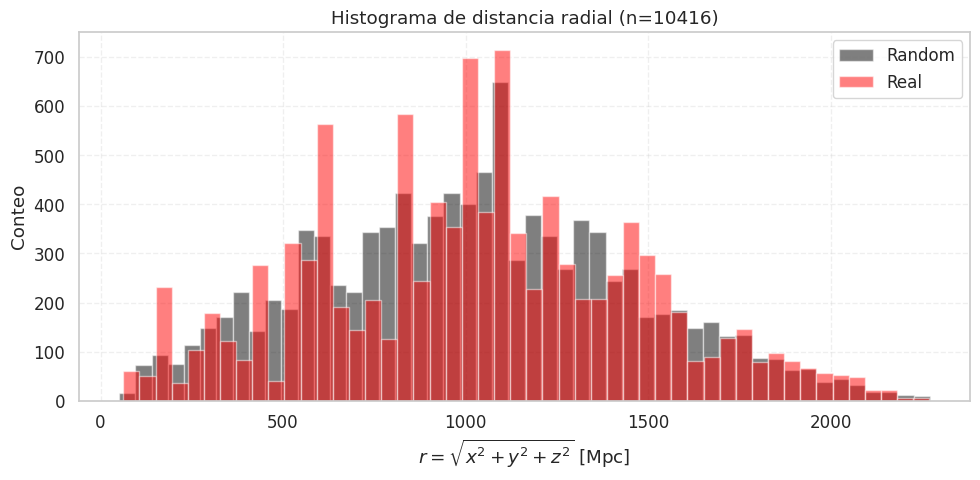

In [89]:
plot_r_histogram_with_debug(df_typed)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import os

save_dir = "../05_visualizaciones/histogramas_r_por_roseta"
os.makedirs(save_dir, exist_ok=True)

for ros_key, df in rosetas_dict.items():
    if not {'X', 'Y', 'Z', 'RAN'}.issubset(df.columns):
        print(f"Roseta {ros_key} no tiene columnas necesarias")
        continue

    df_real = df[df['RAN'] == False].copy()
    df_rand = df[df['RAN'] == True].copy()

    n_points = min(len(df_real), len(df_rand))
    if n_points == 0:
        print(f"Roseta {ros_key} no tiene datos reales o randoms")
        continue

    df_real_sampled = df_real.sample(n=n_points, random_state=0)
    df_rand_sampled = df_rand.sample(n=n_points, random_state=0)

    r_real = np.sqrt(df_real_sampled['X']**2 + df_real_sampled['Y']**2 + df_real_sampled['Z']**2)
    r_rand = np.sqrt(df_rand_sampled['X']**2 + df_rand_sampled['Y']**2 + df_rand_sampled['Z']**2)

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.hist(r_rand, bins=50, alpha=0.5, label='Random', color='black')
    plt.hist(r_real, bins=50, alpha=0.5, label='Real', color='red')
    plt.xlabel(r'$r = \sqrt{x^2 + y^2 + z^2}$ [Mpc]')
    plt.ylabel('Conteo')
    plt.title(f'Roseta {ros_key} – Histograma de distancia radial (n={n_points})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()

    filename = f"hist_r_roseta_{ros_key}.png"
    plt.savefig(os.path.join(save_dir, filename), dpi=200)
    plt.close()

    print(f"Guardado: {filename}")

Guardado: hist_r_roseta_roseta_0.png
Guardado: hist_r_roseta_roseta_1.png
Guardado: hist_r_roseta_roseta_2.png
Guardado: hist_r_roseta_roseta_3.png
Guardado: hist_r_roseta_roseta_4.png
Guardado: hist_r_roseta_roseta_5.png
Guardado: hist_r_roseta_roseta_6.png
Guardado: hist_r_roseta_roseta_7.png
Guardado: hist_r_roseta_roseta_8.png
Guardado: hist_r_roseta_roseta_9.png
Guardado: hist_r_roseta_roseta_10.png
Guardado: hist_r_roseta_roseta_11.png
Guardado: hist_r_roseta_roseta_12.png
Guardado: hist_r_roseta_roseta_13.png
Guardado: hist_r_roseta_roseta_14.png
Guardado: hist_r_roseta_roseta_15.png
Guardado: hist_r_roseta_roseta_16.png
Guardado: hist_r_roseta_roseta_17.png
Guardado: hist_r_roseta_roseta_18.png
Guardado: hist_r_roseta_roseta_19.png


FileNotFoundError: [Errno 2] No such file or directory: '../05_visualizaciones/histogramas_z/hist_z_total_BGS.png'

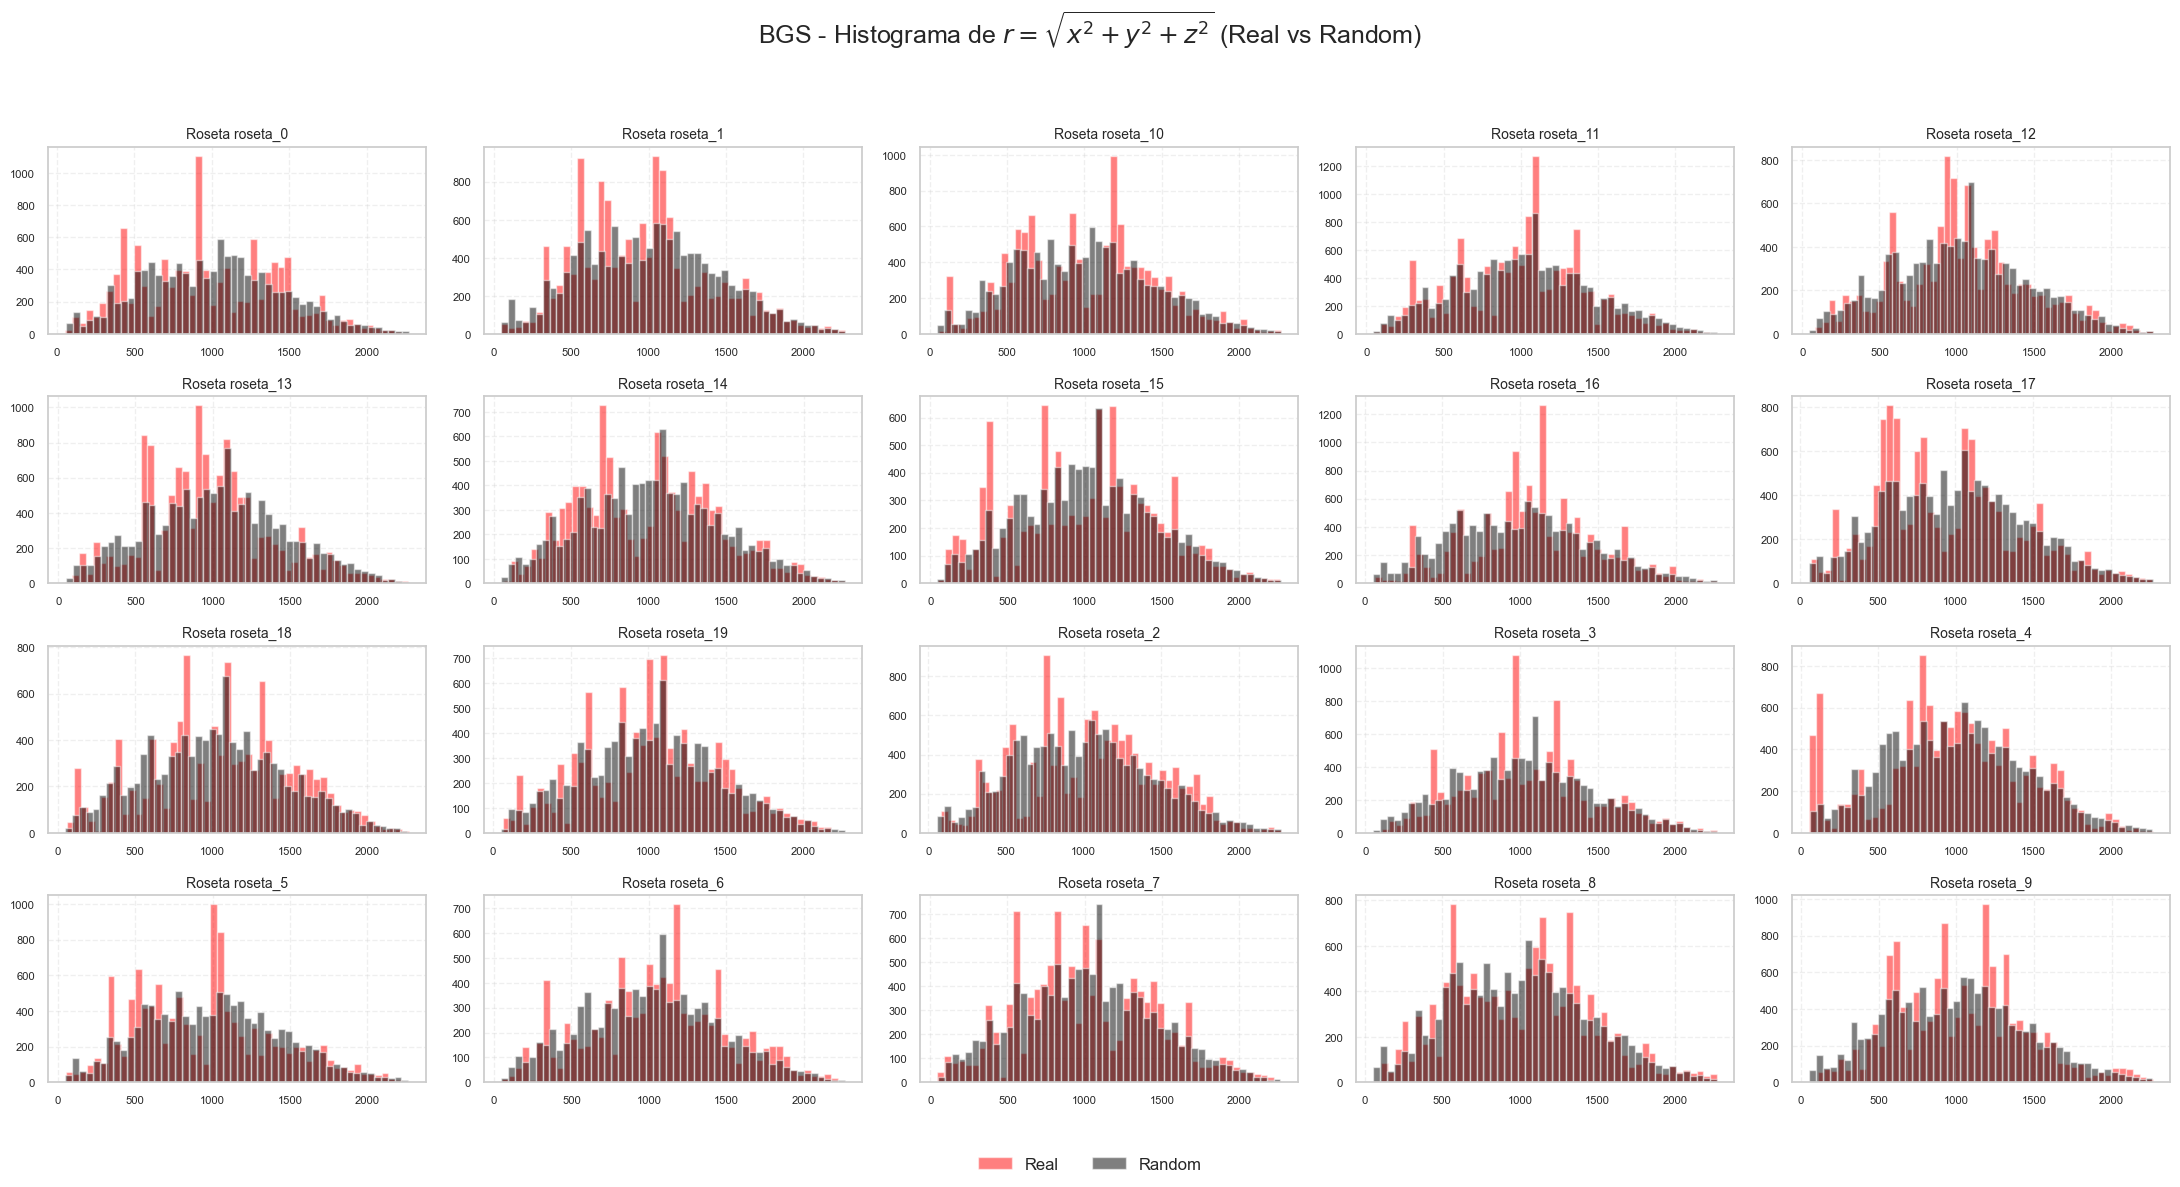

In [89]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 5, figsize=(22, 12))
axes = axes.flatten()

rosetas = sorted(rosetas_dict.keys())
bins = 50

handle_real, handle_rand = None, None

for i, roseta in enumerate(rosetas):
    ax = axes[i]
    df = rosetas_dict[roseta]

    if not {'X', 'Y', 'Z', 'RAN'}.issubset(df.columns):
        print(f"Roseta {roseta} no tiene columnas completas")
        continue

    df_real = df[~df['RAN']].copy()
    df_rand = df[df['RAN']].copy()

    if len(df_real) == 0 or len(df_rand) == 0:
        print(f"Roseta {roseta} vacía en uno de los conjuntos")
        continue

    n = min(len(df_real), len(df_rand))
    df_real_sample = df_real.sample(n=n, random_state=42)
    df_rand_sample = df_rand.sample(n=n, random_state=42)

    r_real = np.sqrt(df_real_sample['X']**2 + df_real_sample['Y']**2 + df_real_sample['Z']**2)
    r_rand = np.sqrt(df_rand_sample['X']**2 + df_rand_sample['Y']**2 + df_rand_sample['Z']**2)

    hist_real = ax.hist(r_real, bins=bins, alpha=0.5, label='Real', color='red')
    hist_rand = ax.hist(r_rand, bins=bins, alpha=0.5, label='Random', color='black')

    if handle_real is None or handle_rand is None:
        # Guardar handles para la leyenda global
        handle_real = ax.patches[0]
        handle_rand = ax.patches[len(hist_real[0])]

    ax.set_title(f'Roseta {roseta}', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.3)

fig.suptitle(r'BGS - Histograma de $r = \sqrt{x^2 + y^2 + z^2}$ (Real vs Random)', fontsize=18)

fig.legend([handle_real, handle_rand], ['Real', 'Random'],
           loc='lower center', ncol=2, fontsize=12, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("../05_visualizaciones/histogramas_z/hist_z_total_BGS.png", dpi=200)
plt.show()
